# Step 3: Pre-Processing

In [396]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import linregress

In [2]:
# Load the data

os.chdir("C:\\Users\\moham\\OneDrive\\Desktop\\Other\\Bootcamp\\Capstone_2\\ProjectIdeas_Initial\\Processed_Cleaned")

df_yearly_n = pd.read_csv('df_yearly_n.csv')
df_daily_global_africa = pd.read_csv('df_daily_global_africa.csv')

In [3]:
df_yearly_n.info(); df_yearly_n.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   timestamp                                                                              35 non-null     object 
 1   Fuel exports (% of merchandise exports)_new                                            35 non-null     float64
 2   Fuel imports (% of merchandise imports)_new                                            35 non-null     float64
 3   Mineral rents (% of GDP)_new                                                           35 non-null     float64
 4   Ores and metals exports (% of merchandise exports)_new                                 35 non-null     float64
 5   Agricultural land (sq. km)_new                                                  

,timestamp,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
0,1985-12-31,16.049569,31.505091,-0.015081,2.396915,263539.772712,3769.475532,0.164350,17655.589742,97.081484,...,0.010746,90.991803,11.101956,56.385246,390.020037,5206.842770,1016.884426,78.278155,0.185156,89.193956
1,1986-12-31,11.553283,18.175905,-0.062012,2.021242,263730.129815,4162.057395,0.401157,17985.909700,96.050409,...,0.048485,89.186301,9.981332,56.281610,362.851565,4917.710769,1017.015068,77.137254,0.187715,94.789442
2,1987-12-31,13.490679,19.930905,-0.080505,2.750079,264350.127134,5174.149822,0.603448,18103.049231,96.468244,...,0.026124,90.783562,10.073105,48.473973,414.414382,5085.708614,1017.226849,77.523438,0.190518,91.377100
3,1988-12-31,13.340277,20.084218,0.033528,2.747874,266620.158277,4789.021959,0.004943,19137.800915,97.186201,...,0.033228,90.371585,9.819856,58.558094,354.880393,4559.705777,1016.611749,76.145600,0.201754,95.228952
4,1989-12-31,13.277840,19.945590,0.090388,2.660007,270529.987242,5192.579463,0.647776,19883.305509,98.990194,...,0.036069,90.150685,9.963718,58.844555,342.414080,4610.768074,1016.810411,75.765948,0.202178,92.094229


In [4]:
df_daily_global_africa.info(); 
del df_daily_global_africa['Unnamed: 0'] 
df_daily_global_africa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 65 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Unnamed: 0                                                                             12540 non-null  int64  
 1   timestamp                                                                              12540 non-null  object 
 2   Year_extract                                                                           12540 non-null  int64  
 3   CO2 emissions from liquid fuel consumption (kt)_new                                    12540 non-null  float64
 4   Energy related methane emissions (% of total)_new                                      12540 non-null  float64
 5   Fuel exports (% of merchandise exports)_new                               

,timestamp,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Ores and metals exports (% of merchandise exports)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
0,1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,1.829561,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1,1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,2.517605,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
2,1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,-1.140219,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
3,1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,6.203908,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
4,1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,0.028296,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


In [5]:
df_daily_global_africa['timestamp'] = pd.to_datetime(df_daily_global_africa['timestamp']);
df_daily_n = df_daily_global_africa[['timestamp',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Mineral rents (% of GDP)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new',
       'Urban population_new', 'N_Temperature_m', 'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm', 'N_Wind_Direction_Dominant_10m']];
df_daily_n.head(); df_daily_n.info()

,timestamp,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
0,1985-09-01,16.476346,28.932601,1.365497,1.829561,263539.836746,3768.928001,3.190965,17657.099043,96.950536,...,0.0,84,10.398747,93.291664,95.106384,3090.0800,1017.5,74.13800,0.172,112.53505
1,1985-09-02,18.765827,31.529024,0.703036,2.517605,263541.850657,3770.763728,-3.560668,17656.019487,96.734072,...,0.0,86,11.937781,86.625000,188.297870,3262.7397,1017.8,75.27202,0.172,110.25738
2,1985-09-03,12.745660,31.855229,-3.874296,-1.140219,263534.476745,3768.274402,-0.639366,17656.693362,97.193721,...,0.0,88,10.664815,96.625000,47.872337,3485.2400,1018.3,76.26199,0.193,108.77132
3,1985-09-04,15.393883,30.340974,0.019061,6.203908,263542.171340,3770.260578,-1.335888,17654.099834,93.197804,...,0.0,85,8.518000,94.166664,81.702126,2620.1597,1018.6,73.52602,0.202,107.01516
4,1985-09-05,13.529428,30.462148,-1.444538,0.028296,263536.351388,3771.964733,2.115213,17655.083125,98.020674,...,0.0,86,10.187275,68.375000,426.110630,4981.3300,1017.1,78.72798,0.202,106.76452


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   timestamp                                                                              12540 non-null  datetime64[ns]
 1   Fuel exports (% of merchandise exports)_new                                            12540 non-null  float64       
 2   Fuel imports (% of merchandise imports)_new                                            12540 non-null  float64       
 3   Mineral rents (% of GDP)_new                                                           12540 non-null  float64       
 4   Ores and metals exports (% of merchandise exports)_new                                 12540 non-null  float64       
 5   Agricultural land (sq. km

In [6]:
df_daily_n.set_index('timestamp', inplace=True)




In [7]:
df_daily_n.index = df_daily_n.index.normalize()
df_daily_n.head()
df_daily_n.columns

,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Mineral rents (% of GDP)_new,Ores and metals exports (% of merchandise exports)_new,Agricultural land (sq. km)_new,CO2 emissions (kt)_new,"Foreign direct investment, net inflows (% of GDP)_new",Methane emissions (kt of CO2 equivalent)_new,"Mortality rate, under-5 (per 1,000 live births)_new",Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,...,N_Precipitation_Total,N_Relative_Humidity_m,N_Wind_Speed_10m,N_Cloud_Cover_Total,N_Sunshine_Duration,N_Shortwave_Radiation,N_Mean_Sea_Level_Pressure,N_Soil_Temperature_10cm,N_Soil_Moisture_10cm,N_Wind_Direction_Dominant_10m
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-09-01,16.476346,28.932601,1.365497,1.829561,263539.836746,3768.928001,3.190965,17657.099043,96.950536,7957.632802,...,0.0,84,10.398747,93.291664,95.106384,3090.0800,1017.5,74.13800,0.172,112.53505
1985-09-02,18.765827,31.529024,0.703036,2.517605,263541.850657,3770.763728,-3.560668,17656.019487,96.734072,7956.316590,...,0.0,86,11.937781,86.625000,188.297870,3262.7397,1017.8,75.27202,0.172,110.25738
1985-09-03,12.745660,31.855229,-3.874296,-1.140219,263534.476745,3768.274402,-0.639366,17656.693362,97.193721,7956.062528,...,0.0,88,10.664815,96.625000,47.872337,3485.2400,1018.3,76.26199,0.193,108.77132
1985-09-04,15.393883,30.340974,0.019061,6.203908,263542.171340,3770.260578,-1.335888,17654.099834,93.197804,7958.529672,...,0.0,85,8.518000,94.166664,81.702126,2620.1597,1018.6,73.52602,0.202,107.01516
1985-09-05,13.529428,30.462148,-1.444538,0.028296,263536.351388,3771.964733,2.115213,17655.083125,98.020674,7956.609886,...,0.0,86,10.187275,68.375000,426.110630,4981.3300,1017.1,78.72798,0.202,106.76452


Index(['Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Mineral rents (% of GDP)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new', 'CO2 emissions (kt)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Mortality rate, under-5 (per 1,000 live births)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm'

In [8]:
new_clt_climate_df = df_daily_n[['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new',
       'Urban population_new', 'N_Temperature_m', 
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure',
       'N_Soil_Moisture_10cm'

                    ]];


new_clt_climate_df.head()

,CO2 emissions (kt)_new,Methane emissions (kt of CO2 equivalent)_new,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,"Population, total_new",Urban population_new,N_Temperature_m,N_Precipitation_Total,N_Relative_Humidity_m,N_Mean_Sea_Level_Pressure,N_Soil_Moisture_10cm
timestamp,,,,,,,,,,
1985-09-01,3768.928001,17657.099043,7957.632802,1.987708e+07,3.196036e+06,69.62904,0.0,84,1017.5,0.172
1985-09-02,3770.763728,17656.019487,7956.316590,1.987708e+07,3.196035e+06,71.60905,0.0,86,1017.8,0.172
1985-09-03,3768.274402,17656.693362,7956.062528,1.987708e+07,3.196035e+06,71.64504,0.0,88,1018.3,0.193
1985-09-04,3770.260578,17654.099834,7958.529672,1.987708e+07,3.196037e+06,70.79904,0.0,85,1018.6,0.202
1985-09-05,3771.964733,17655.083125,7956.609886,1.987708e+07,3.196036e+06,73.30104,0.0,86,1017.1,0.202


In [9]:
new_clt_climate_df.index

DatetimeIndex(['1985-09-01', '1985-09-02', '1985-09-03', '1985-09-04',
               '1985-09-05', '1985-09-06', '1985-09-07', '1985-09-08',
               '1985-09-09', '1985-09-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='timestamp', length=12540, freq='D')

In [10]:
# Verify data types
new_clt_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12540 entries, 1985-09-01 to 2019-12-31
Freq: D
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   CO2 emissions (kt)_new                                                12540 non-null  float64
 1   Methane emissions (kt of CO2 equivalent)_new                          12540 non-null  float64
 2   Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new  12540 non-null  float64
 3   Population, total_new                                                 12540 non-null  float64
 4   Urban population_new                                                  12540 non-null  float64
 5   N_Temperature_m                                                       12540 non-null  float64
 6   N_Precipitation_Total                                                

In [15]:
df_1985_1999 = new_clt_climate_df["1985-09-01":"1999-12-31"]
df_1985_1999.info()

df_2000_2019 = new_clt_climate_df["2000-01-01":"2019-12-31"]
df_2000_2019.info()

df_2000_2019_c = df_2000_2019

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5235 entries, 1985-09-01 to 1999-12-31
Freq: D
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   CO2 emissions (kt)_new                                                5235 non-null   float64
 1   Methane emissions (kt of CO2 equivalent)_new                          5235 non-null   float64
 2   Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new  5235 non-null   float64
 3   Population, total_new                                                 5235 non-null   float64
 4   Urban population_new                                                  5235 non-null   float64
 5   N_Temperature_m                                                       5235 non-null   float64
 6   N_Precipitation_Total                                                 

In [16]:
df_2000_2019_monthly = df_2000_2019.resample('M').mean();

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

Text(0.5, 1.0, 'Daily Temperature Variation in Nairobi\n From 2000 to 2019 ')

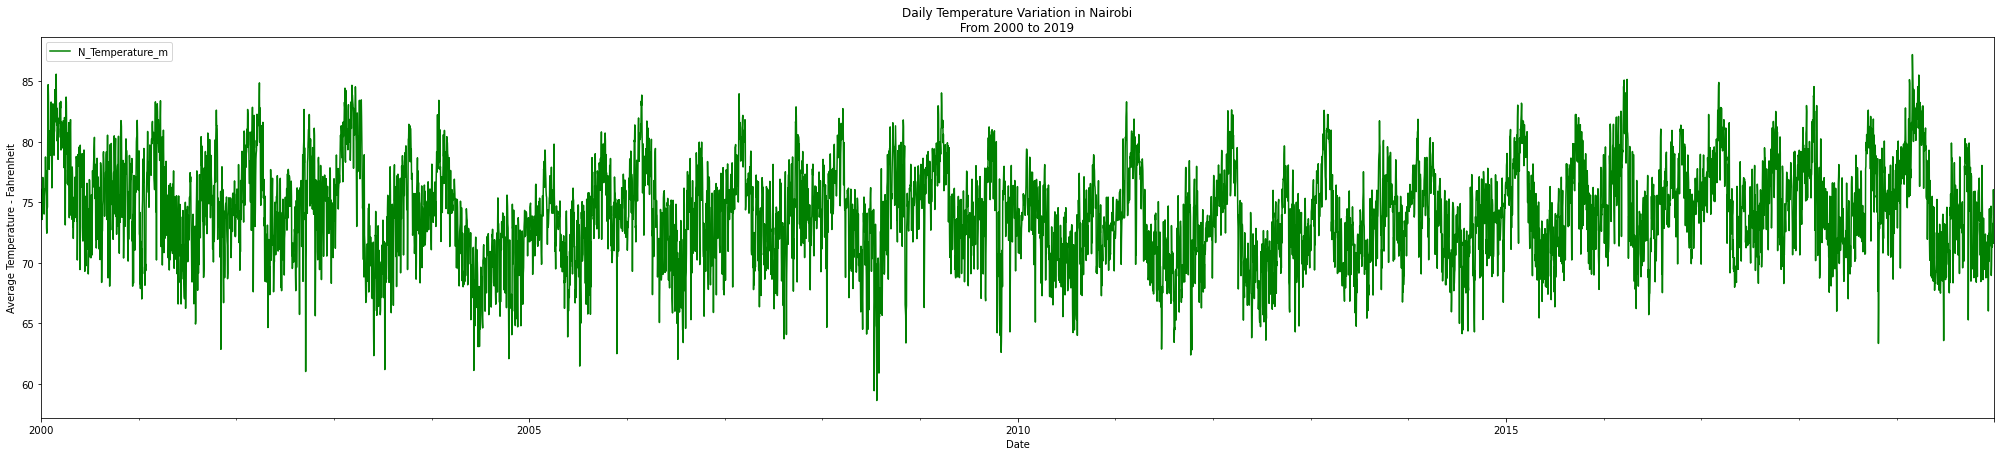

In [17]:
# Visualize some of the 'cleaned' data by plotting the daily avg temperature in Nairobi from 2000 to 2019
df_2000_2019['N_Temperature_m'].plot(figsize=(35,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.title("Daily Temperature Variation in Nairobi\n From 2000 to 2019 ")
plt.show()

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

Text(0.5, 1.0, 'Monthly Temperature Variation in Nairobi\n From 2000 to 2019 ')

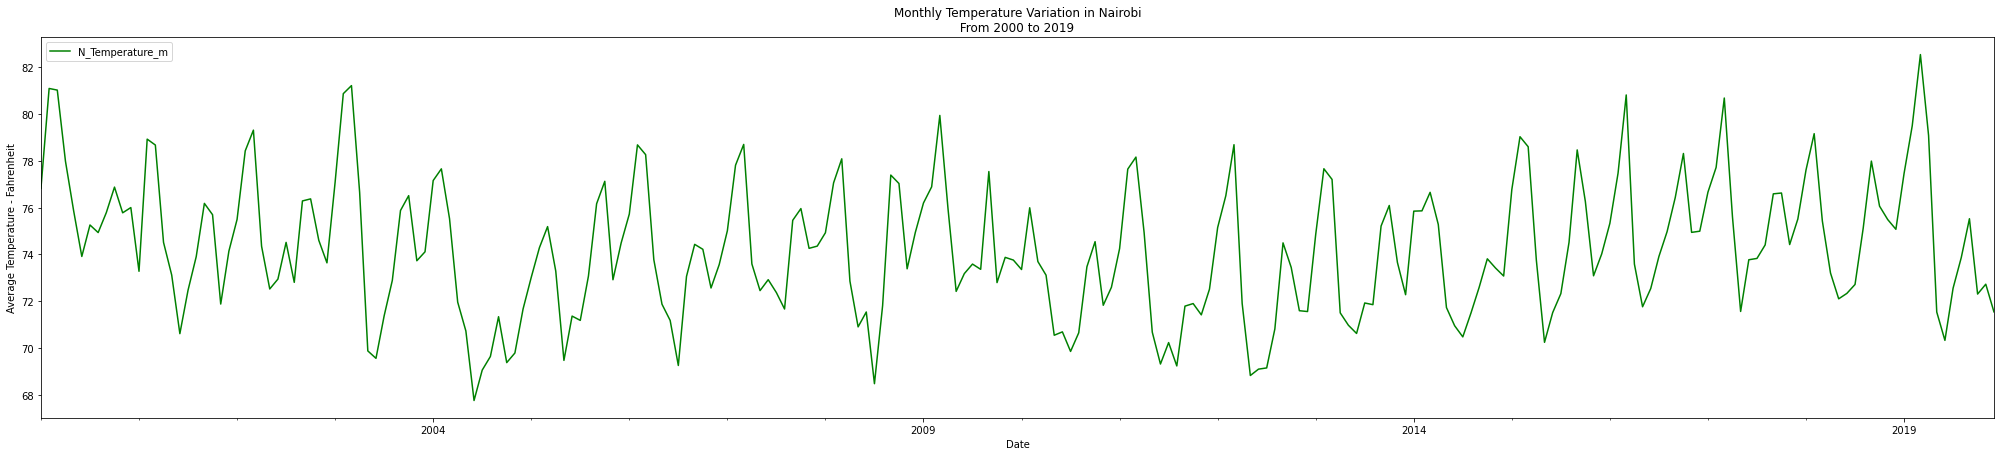

In [18]:
# Visualize some of the 'cleaned' data by plotting the monthly avg temperature in Nairobi from 2000 to 2019
df_2000_2019_monthly['N_Temperature_m'].plot(figsize=(35,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.title("Monthly Temperature Variation in Nairobi\n From 2000 to 2019 ")
plt.show()

Derive Features for Weather Prediction Experiment

In [19]:
df_2000_2019.columns

Index(['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Moisture_10cm'],
      dtype='object')

In [39]:
features = ['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'Urban population_new','N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Moisture_10cm']
# Function that creates columns representing Nth prior measurements of feature
# None values maintain the consistent rows length for each N
def derive_nth_day_feature(df_2000_2019, feature, N):  
    rows = df_2000_2019.shape[0]
    nth_prior_measurements = [None]*N + [df_2000_2019[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df_2000_2019[col_name] = nth_prior_measurements

In [40]:
# Call the above function using a loop through each feature
for feature in features:  
    if feature != 'DATE':
        for N in range(1, 4):
            derive_nth_day_feature(df_2000_2019, feature, N)

<ipython-input-39-44b7f7bc2e0b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_2019[col_name] = nth_prior_measurements


In [41]:
# Evaluate the distribution of the feature data and transpose it; drop latitude and longitude values
spread = df_2000_2019.describe().T
spread

,count,mean,std,min,25%,50%,75%,max
CO2 emissions (kt)_new,7302.0,1.221704e+04,4.199667e+03,6.524713e+03,8.323526e+03,1.212563e+04,1.657223e+04,1.889629e+04
Methane emissions (kt of CO2 equivalent)_new,7302.0,3.207159e+04,7.049659e+03,2.127384e+04,2.383551e+04,3.527414e+04,3.767150e+04,4.048676e+04
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,7302.0,1.511450e+04,3.254604e+03,9.874092e+03,1.151551e+04,1.687521e+04,1.759534e+04,1.876610e+04
"Population, total_new",7302.0,4.177505e+07,6.337256e+06,3.196455e+07,3.662489e+07,4.203068e+07,4.758377e+07,5.257397e+07
Urban population_new,7302.0,9.960945e+06,2.468821e+06,6.358383e+06,7.938440e+06,9.907048e+06,1.215802e+07,1.446153e+07
N_Temperature_m,7302.0,7.422655e+01,3.987833e+00,5.863105e+01,7.144704e+01,7.427304e+01,7.693704e+01,8.721504e+01
N_Precipitation_Total,7302.0,4.501948e-02,1.280846e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.149606e-02,2.807087e+00
N_Relative_Humidity_m,7302.0,9.113161e+01,6.480641e+00,5.100000e+01,8.700000e+01,9.300000e+01,9.600000e+01,1.000000e+02
N_Mean_Sea_Level_Pressure,7302.0,1.016960e+03,1.753984e+00,1.010800e+03,1.015700e+03,1.016900e+03,1.018100e+03,1.022800e+03
N_Soil_Moisture_10cm,7302.0,2.202962e-01,5.880886e-02,7.600000e-02,1.740000e-01,2.160000e-01,2.710000e-01,3.710000e-01


In [42]:
# Drop rows with NaN values
df_2000_2019 = df_2000_2019.dropna()  
df_2000_2019.head()

,CO2 emissions (kt)_new,Methane emissions (kt of CO2 equivalent)_new,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,"Population, total_new",Urban population_new,N_Temperature_m,N_Precipitation_Total,N_Relative_Humidity_m,N_Mean_Sea_Level_Pressure,N_Soil_Moisture_10cm,...,N_Precipitation_Total_3,N_Relative_Humidity_m_1,N_Relative_Humidity_m_2,N_Relative_Humidity_m_3,N_Mean_Sea_Level_Pressure_1,N_Mean_Sea_Level_Pressure_2,N_Mean_Sea_Level_Pressure_3,N_Soil_Moisture_10cm_1,N_Soil_Moisture_10cm_2,N_Soil_Moisture_10cm_3
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-07,8229.000053,21279.218385,9874.091644,3.196456e+07,6.358389e+06,76.451040,0.0,100,1013.9,0.150,...,0.0,98.0,91.0,93.0,1014.2,1014.5,1013.6,0.154,0.158,0.162
2000-01-08,8230.634945,21281.821471,9879.977057,3.196456e+07,6.358389e+06,77.063040,0.0,97,1013.0,0.147,...,0.0,100.0,98.0,91.0,1013.9,1014.2,1014.5,0.150,0.154,0.158
2000-01-09,8231.667101,21276.187180,9878.654952,3.196456e+07,6.358392e+06,75.479050,0.0,94,1013.1,0.142,...,0.0,97.0,100.0,98.0,1013.0,1013.9,1014.2,0.147,0.150,0.154
2000-01-10,8228.025209,21280.695320,9876.591828,3.196456e+07,6.358389e+06,74.723045,0.0,99,1013.8,0.139,...,0.0,94.0,97.0,100.0,1013.1,1013.0,1013.9,0.142,0.147,0.150
2000-01-11,8232.780348,21275.603608,9878.841187,3.196456e+07,6.358391e+06,76.109050,0.0,100,1014.1,0.136,...,0.0,99.0,94.0,97.0,1013.8,1013.1,1013.0,0.139,0.142,0.147


In [43]:
# Assess the linearity between variables using the Pearson correlation coefficient. 
df_linear = df_2000_2019.corr()[['N_Temperature_m']].sort_values('N_Temperature_m')
df_linear
df_2000_2019.columns

,N_Temperature_m
N_Soil_Moisture_10cm,-0.634719
N_Soil_Moisture_10cm_1,-0.595253
N_Soil_Moisture_10cm_2,-0.563111
N_Soil_Moisture_10cm_3,-0.541801
N_Mean_Sea_Level_Pressure,-0.334528
N_Precipitation_Total,-0.261820
N_Mean_Sea_Level_Pressure_1,-0.259780
N_Relative_Humidity_m,-0.239415
N_Mean_Sea_Level_Pressure_2,-0.224828
N_Precipitation_Total_1,-0.224110


Index(['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Moisture_10cm',
       'CO2 emissions (kt)_new_1', 'CO2 emissions (kt)_new_2',
       'CO2 emissions (kt)_new_3',
       'Methane emissions (kt of CO2 equivalent)_new_1',
       'Methane emissions (kt of CO2 equivalent)_new_2',
       'Methane emissions (kt of CO2 equivalent)_new_3',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3',
       'Population, total_new_1', 'Population, total_new_2',
       'Population, total_new_3', 'Urban population_new_1',
       '

Visualizing Feature Relationships

In [44]:
# Create new dataframe with features of interest
predictors = ['CO2 emissions (kt)_new_1', 'CO2 emissions (kt)_new_2',
       'CO2 emissions (kt)_new_3',
       'Methane emissions (kt of CO2 equivalent)_new_1',
       'Methane emissions (kt of CO2 equivalent)_new_2',
       'Methane emissions (kt of CO2 equivalent)_new_3',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3',
       'Population, total_new_1', 'Population, total_new_2',
       'Population, total_new_3', 'Urban population_new_1',
       'Urban population_new_2', 'Urban population_new_3','N_Temperature_m_1', 'N_Temperature_m_2', 'N_Temperature_m_3',
       'N_Precipitation_Total_1', 'N_Precipitation_Total_2',
       'N_Precipitation_Total_3', 'N_Relative_Humidity_m_1',
       'N_Relative_Humidity_m_2', 'N_Relative_Humidity_m_3',
       'N_Mean_Sea_Level_Pressure_1', 'N_Mean_Sea_Level_Pressure_2',
       'N_Mean_Sea_Level_Pressure_3', 'N_Soil_Moisture_10cm_1',
       'N_Soil_Moisture_10cm_2', 'N_Soil_Moisture_10cm_3']
new_clt_climate_df2 = df_2000_2019[['N_Temperature_m'] + predictors] 
new_clt_climate_df2.head()

,N_Temperature_m,CO2 emissions (kt)_new_1,CO2 emissions (kt)_new_2,CO2 emissions (kt)_new_3,Methane emissions (kt of CO2 equivalent)_new_1,Methane emissions (kt of CO2 equivalent)_new_2,Methane emissions (kt of CO2 equivalent)_new_3,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3,...,N_Precipitation_Total_3,N_Relative_Humidity_m_1,N_Relative_Humidity_m_2,N_Relative_Humidity_m_3,N_Mean_Sea_Level_Pressure_1,N_Mean_Sea_Level_Pressure_2,N_Mean_Sea_Level_Pressure_3,N_Soil_Moisture_10cm_1,N_Soil_Moisture_10cm_2,N_Soil_Moisture_10cm_3
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-07,76.451040,8227.697553,8231.555566,8227.097441,21277.357446,21278.748575,21282.474290,9881.726990,9878.751307,9877.197168,...,0.0,98.0,91.0,93.0,1014.2,1014.5,1013.6,0.154,0.158,0.162
2000-01-08,77.063040,8229.000053,8227.697553,8231.555566,21279.218385,21277.357446,21278.748575,9874.091644,9881.726990,9878.751307,...,0.0,100.0,98.0,91.0,1013.9,1014.2,1014.5,0.150,0.154,0.158
2000-01-09,75.479050,8230.634945,8229.000053,8227.697553,21281.821471,21279.218385,21277.357446,9879.977057,9874.091644,9881.726990,...,0.0,97.0,100.0,98.0,1013.0,1013.9,1014.2,0.147,0.150,0.154
2000-01-10,74.723045,8231.667101,8230.634945,8229.000053,21276.187180,21281.821471,21279.218385,9878.654952,9879.977057,9874.091644,...,0.0,94.0,97.0,100.0,1013.1,1013.0,1013.9,0.142,0.147,0.150
2000-01-11,76.109050,8228.025209,8231.667101,8230.634945,21280.695320,21276.187180,21281.821471,9876.591828,9878.654952,9879.977057,...,0.0,99.0,94.0,97.0,1013.8,1013.1,1013.0,0.139,0.142,0.147


Using Step-wise Regression to Build a Model

To test for the effects of interactions on the significance of any one variable in a linear regression model a technique known as step-wise regression is often applied. Using step-wise regression you add or remove variables from the model and assess the statistical significance of each variable on the resultant model.

A backward elimination technique will be applied using the following steps:

Select a significance level Α for which you test your hypothesis against to determine if a variable should stay in the model
Fit the model with all predictor variables
Evaluate the p-values of the βj coefficients and for the one with the greatest p-value, if p-value > Α progress to step 4, if not you have your final model
Remove the predictor identified in step 3
Fit the model again but, this time without the removed variable and cycle back to step 3
These steps will help to select statistically meaningful predictors (features)

In [45]:
# Separate predictor variables (X) from the outcome variable y
X = new_clt_climate_df2[predictors]  
y = new_clt_climate_df2['N_Temperature_m']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.iloc[:5, :5]  

,const,CO2 emissions (kt)_new_1,CO2 emissions (kt)_new_2,CO2 emissions (kt)_new_3,Methane emissions (kt of CO2 equivalent)_new_1
timestamp,,,,,
2000-01-07,1.0,8227.697553,8231.555566,8227.097441,21277.357446
2000-01-08,1.0,8229.000053,8227.697553,8231.555566,21279.218385
2000-01-09,1.0,8230.634945,8229.000053,8227.697553,21281.821471
2000-01-10,1.0,8231.667101,8230.634945,8229.000053,21276.187180
2000-01-11,1.0,8228.025209,8231.667101,8230.634945,21280.695320


In [46]:
# Step 1 - Select a significance value
alpha = 0.05

# Step 2 - Fit the model
model = sm.OLS(y, X).fit()

# Step 3 - Evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     400.7
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:44:39   Log-Likelihood:                -16892.
No. Observations:                7299   AIC:                         3.385e+04
Df Residuals:                    7268   BIC:                         3.406e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    132.0893     23.759      5.560      0.000      85.515     178.664
CO2 emissions (kt)_new_1                                                  -0.0003      0.001     -0.513      0.608      -0.002       0.001
CO2 emissions (kt)_new_2                                                   0.0009      0.001      0.949      0.343      -0.001       0.003
CO2 emissions (kt)_new_3                                                  -0.0005      0.001     -0.773      0.439      -0.002       0.001
Methane emissions (kt of CO2 equivalent)_new_1                             0.0005      0.001      0.487      0.626      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                          5.304e-05      0.002      0.035      0.972      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0007      0.001     -0.655      0.512      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0007      0.002     -0.332      0.740      -0.005       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0006      0.003     -0.227      0.821      -0.006       0.005
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0015      0.002      0.750      0.453      -0.002       0.006
Population, total_new_1                                                -3.742e-06   4.57e-06     -0.819      0.413   -1.27e-05    5.21e-06
Population, total_new_2                                                 7.699e-06   6.45e-06      1.194      0.233   -4.94e-06    2.03e-05
Population, total_new_3                                                -3.989e-06   4.57e-06     -0.873      0.382   -1.29e-05    4.96e-06
Urban population_new_1                                                  1.048e-05   1.14e-05      0.922      0.357   -1.18e-05    3.28e-05
Urban population_new_2                                                  -2.09e-05    1.6e-05     -1.302      0.193   -5.24e-05    1.06e-05
Urban population_new_3                                                  1.062e-05   1.14e-05      0.934      0.350   -1.17e-05    3.29e-05
N_Temperature_m_1                                                          0.5696      0.013     44.492      0.000       0.544       0.595
N_Temperature_m_2                                                          0.0408      0.015      2.810      0.005       0.012       0.069
N_Temperature_m_3                                                          0.0702      0.013      5.353      0.000       0.045       0.096
N_Precipitation_Total_1  

In [47]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('N_Precipitation_Total_1', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     414.6
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:44:40   Log-Likelihood:                -16892.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7269   BIC:                         3.405e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    131.6276     23.727      5.548      0.000      85.116     178.139
CO2 emissions (kt)_new_1                                                  -0.0003      0.001     -0.515      0.607      -0.002       0.001
CO2 emissions (kt)_new_2                                                   0.0009      0.001      0.950      0.342      -0.001       0.003
CO2 emissions (kt)_new_3                                                  -0.0005      0.001     -0.773      0.440      -0.002       0.001
Methane emissions (kt of CO2 equivalent)_new_1                             0.0005      0.001      0.488      0.625      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                          4.985e-05      0.002      0.033      0.974      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0007      0.001     -0.655      0.513      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0007      0.002     -0.332      0.740      -0.005       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0006      0.003     -0.226      0.821      -0.006       0.005
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0015      0.002      0.749      0.454      -0.002       0.006
Population, total_new_1                                                -3.762e-06   4.57e-06     -0.824      0.410   -1.27e-05    5.19e-06
Population, total_new_2                                                  7.72e-06   6.45e-06      1.197      0.231   -4.92e-06    2.04e-05
Population, total_new_3                                                -3.989e-06   4.57e-06     -0.873      0.382   -1.29e-05    4.96e-06
Urban population_new_1                                                  1.053e-05   1.14e-05      0.927      0.354   -1.18e-05    3.28e-05
Urban population_new_2                                                 -2.096e-05    1.6e-05     -1.306      0.192   -5.24e-05    1.05e-05
Urban population_new_3                                                  1.062e-05   1.14e-05      0.934      0.350   -1.17e-05    3.29e-05
N_Temperature_m_1                                                          0.5699      0.013     44.658      0.000       0.545       0.595
N_Temperature_m_2                                                          0.0402      0.014      2.785      0.005       0.012       0.069
N_Temperature_m_3                                                          0.0704      0.013      5.367      0.000       0.045       0.096
N_Precipitation_Total_2  

In [50]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('N_Precipitation_Total_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

KeyError: "['N_Precipitation_Total_2'] not found in axis"

In [ ]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 4
X = X.drop('N_Relative_Humidity_m_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

In [ ]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 5
X = X.drop('N_Precipitation_Total_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

In [51]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 6
X = X.drop('N_Relative_Humidity_m_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     462.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -16892.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7272   BIC:                         3.402e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    134.9074     23.324      5.784      0.000      89.186     180.629
CO2 emissions (kt)_new_1                                                  -0.0003      0.001     -0.510      0.610      -0.002       0.001
CO2 emissions (kt)_new_2                                                   0.0009      0.001      0.943      0.345      -0.001       0.003
CO2 emissions (kt)_new_3                                                  -0.0005      0.001     -0.768      0.443      -0.002       0.001
Methane emissions (kt of CO2 equivalent)_new_1                             0.0005      0.001      0.476      0.634      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                          5.908e-05      0.002      0.039      0.969      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0007      0.001     -0.651      0.515      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0007      0.002     -0.321      0.748      -0.005       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0007      0.003     -0.231      0.817      -0.006       0.005
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0015      0.002      0.745      0.456      -0.002       0.006
Population, total_new_1                                                -3.717e-06   4.56e-06     -0.814      0.416   -1.27e-05    5.23e-06
Population, total_new_2                                                 7.672e-06   6.44e-06      1.190      0.234   -4.96e-06    2.03e-05
Population, total_new_3                                                 -3.98e-06   4.57e-06     -0.872      0.383   -1.29e-05    4.97e-06
Urban population_new_1                                                  1.044e-05   1.14e-05      0.919      0.358   -1.18e-05    3.27e-05
Urban population_new_2                                                 -2.083e-05    1.6e-05     -1.299      0.194   -5.23e-05    1.06e-05
Urban population_new_3                                                  1.057e-05   1.14e-05      0.930      0.352   -1.17e-05    3.28e-05
N_Temperature_m_1                                                          0.5700      0.013     44.692      0.000       0.545       0.595
N_Temperature_m_2                                                          0.0393      0.014      2.735      0.006       0.011       0.067
N_Temperature_m_3                                                          0.0706      0.013      5.421      0.000       0.045       0.096
N_Precipitation_Total_3  

In [52]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 7
X = X.drop('N_Mean_Sea_Level_Pressure_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     481.0
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -16893.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7273   BIC:                         3.402e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    142.6321     22.048      6.469      0.000      99.411     185.853
CO2 emissions (kt)_new_1                                                  -0.0003      0.001     -0.508      0.611      -0.002       0.001
CO2 emissions (kt)_new_2                                                   0.0009      0.001      0.952      0.341      -0.001       0.003
CO2 emissions (kt)_new_3                                                  -0.0005      0.001     -0.781      0.435      -0.002       0.001
Methane emissions (kt of CO2 equivalent)_new_1                             0.0005      0.001      0.500      0.617      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                          2.822e-05      0.002      0.018      0.985      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0007      0.001     -0.647      0.518      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0007      0.002     -0.343      0.731      -0.005       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0006      0.003     -0.212      0.832      -0.006       0.005
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0015      0.002      0.741      0.459      -0.002       0.006
Population, total_new_1                                                -3.759e-06   4.56e-06     -0.823      0.410   -1.27e-05    5.19e-06
Population, total_new_2                                                 7.711e-06   6.44e-06      1.196      0.232   -4.92e-06    2.03e-05
Population, total_new_3                                                -3.977e-06   4.57e-06     -0.871      0.384   -1.29e-05    4.97e-06
Urban population_new_1                                                  1.053e-05   1.14e-05      0.927      0.354   -1.17e-05    3.28e-05
Urban population_new_2                                                 -2.093e-05    1.6e-05     -1.305      0.192   -5.24e-05    1.05e-05
Urban population_new_3                                                  1.058e-05   1.14e-05      0.931      0.352   -1.17e-05    3.29e-05
N_Temperature_m_1                                                          0.5668      0.012     45.882      0.000       0.543       0.591
N_Temperature_m_2                                                          0.0393      0.014      2.735      0.006       0.011       0.067
N_Temperature_m_3                                                          0.0713      0.013      5.480      0.000       0.046       0.097
N_Precipitation_Total_3  

In [53]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 8
X = X.drop('N_Soil_Moisture_10cm_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     500.7
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -16895.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7274   BIC:                         3.401e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    146.7267     21.939      6.688      0.000     103.719     189.734
CO2 emissions (kt)_new_1                                                  -0.0003      0.001     -0.503      0.615      -0.002       0.001
CO2 emissions (kt)_new_2                                                   0.0009      0.001      0.938      0.348      -0.001       0.003
CO2 emissions (kt)_new_3                                                  -0.0005      0.001     -0.762      0.446      -0.002       0.001
Methane emissions (kt of CO2 equivalent)_new_1                             0.0005      0.001      0.492      0.623      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                          4.544e-05      0.002      0.030      0.976      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0007      0.001     -0.649      0.516      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0007      0.002     -0.344      0.731      -0.005       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0006      0.003     -0.216      0.829      -0.006       0.005
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0015      0.002      0.742      0.458      -0.002       0.006
Population, total_new_1                                                -3.801e-06   4.57e-06     -0.833      0.405   -1.28e-05    5.15e-06
Population, total_new_2                                                 7.657e-06   6.45e-06      1.188      0.235   -4.98e-06    2.03e-05
Population, total_new_3                                                -3.895e-06   4.57e-06     -0.853      0.394   -1.28e-05    5.06e-06
Urban population_new_1                                                  1.062e-05   1.14e-05      0.935      0.350   -1.17e-05    3.29e-05
Urban population_new_2                                                 -2.074e-05    1.6e-05     -1.293      0.196   -5.22e-05    1.07e-05
Urban population_new_3                                                  1.033e-05   1.14e-05      0.909      0.364    -1.2e-05    3.26e-05
N_Temperature_m_1                                                          0.5663      0.012     45.845      0.000       0.542       0.591
N_Temperature_m_2                                                          0.0345      0.014      2.441      0.015       0.007       0.062
N_Temperature_m_3                                                          0.0764      0.013      6.003      0.000       0.051       0.101
N_Precipitation_Total_3  

In [54]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 9
X = X.drop('CO2 emissions (kt)_new_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     522.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -16895.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7275   BIC:                         3.400e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    146.7131     21.938      6.688      0.000     103.708     189.719
CO2 emissions (kt)_new_2                                                   0.0005      0.001      0.822      0.411      -0.001       0.002
CO2 emissions (kt)_new_3                                                  -0.0005      0.001     -0.766      0.444      -0.002       0.001
Methane emissions (kt of CO2 equivalent)_new_1                             0.0004      0.001      0.390      0.696      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                             0.0002      0.002      0.106      0.915      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0007      0.001     -0.644      0.519      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0004      0.002     -0.225      0.822      -0.004       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0009      0.003     -0.306      0.759      -0.006       0.005
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0015      0.002      0.737      0.461      -0.002       0.005
Population, total_new_1                                                -3.985e-06   4.55e-06     -0.876      0.381   -1.29e-05    4.94e-06
Population, total_new_2                                                 7.839e-06   6.44e-06      1.218      0.223   -4.78e-06    2.05e-05
Population, total_new_3                                                -3.894e-06   4.57e-06     -0.853      0.394   -1.28e-05    5.06e-06
Urban population_new_1                                                  1.068e-05   1.14e-05      0.940      0.347   -1.16e-05    3.29e-05
Urban population_new_2                                                 -2.079e-05    1.6e-05     -1.296      0.195   -5.22e-05    1.07e-05
Urban population_new_3                                                  1.033e-05   1.14e-05      0.909      0.364    -1.2e-05    3.26e-05
N_Temperature_m_1                                                          0.5664      0.012     45.862      0.000       0.542       0.591
N_Temperature_m_2                                                          0.0344      0.014      2.434      0.015       0.007       0.062
N_Temperature_m_3                                                          0.0763      0.013      6.001      0.000       0.051       0.101
N_Precipitation_Total_3                                                    0.2077      0.253      0.821      0.411      -0.288       0.703
N_Relative_Humidity_m_2  

In [55]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 10
X = X.drop('CO2 emissions (kt)_new_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     546.3
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -16895.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7276   BIC:                         3.399e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    146.6953     21.938      6.687      0.000     103.691     189.700
CO2 emissions (kt)_new_3                                                3.637e-05   3.28e-05      1.107      0.268    -2.8e-05       0.000
Methane emissions (kt of CO2 equivalent)_new_1                             0.0004      0.001      0.393      0.695      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                             0.0004      0.001      0.239      0.811      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0009      0.001     -0.846      0.397      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0004      0.002     -0.228      0.820      -0.004       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0013      0.003     -0.461      0.645      -0.007       0.004
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0019      0.002      0.972      0.331      -0.002       0.006
Population, total_new_1                                                -3.976e-06   4.55e-06     -0.874      0.382   -1.29e-05    4.94e-06
Population, total_new_2                                                 8.129e-06   6.43e-06      1.265      0.206   -4.47e-06    2.07e-05
Population, total_new_3                                                -4.191e-06   4.55e-06     -0.921      0.357   -1.31e-05    4.73e-06
Urban population_new_1                                                  1.065e-05   1.14e-05      0.938      0.348   -1.16e-05    3.29e-05
Urban population_new_2                                                 -2.085e-05    1.6e-05     -1.300      0.194   -5.23e-05    1.06e-05
Urban population_new_3                                                  1.041e-05   1.14e-05      0.916      0.360   -1.19e-05    3.27e-05
N_Temperature_m_1                                                          0.5663      0.012     45.859      0.000       0.542       0.591
N_Temperature_m_2                                                          0.0343      0.014      2.427      0.015       0.007       0.062
N_Temperature_m_3                                                          0.0765      0.013      6.016      0.000       0.052       0.101
N_Precipitation_Total_3                                                    0.2083      0.253      0.824      0.410      -0.287       0.704
N_Relative_Humidity_m_2                                                    0.0101      0.005      1.980      0.048    9.91e-05       0.020
N_Mean_Sea_Level_Pressure

In [56]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 11
X = X.drop('CO2 emissions (kt)_new_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     572.2
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                -16896.
No. Observations:                7299   AIC:                         3.384e+04
Df Residuals:                    7277   BIC:                         3.399e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    145.1699     21.895      6.630      0.000     102.250     188.090
Methane emissions (kt of CO2 equivalent)_new_1                             0.0004      0.001      0.404      0.686      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_2                             0.0004      0.001      0.239      0.811      -0.003       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0009      0.001     -0.831      0.406      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0005      0.002     -0.239      0.811      -0.004       0.003
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0013      0.003     -0.461      0.645      -0.007       0.004
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0019      0.002      0.955      0.340      -0.002       0.006
Population, total_new_1                                                -4.022e-06   4.55e-06     -0.884      0.377   -1.29e-05     4.9e-06
Population, total_new_2                                                 8.128e-06   6.43e-06      1.265      0.206   -4.47e-06    2.07e-05
Population, total_new_3                                                -4.126e-06   4.55e-06     -0.906      0.365    -1.3e-05     4.8e-06
Urban population_new_1                                                  1.076e-05   1.14e-05      0.948      0.343   -1.15e-05     3.3e-05
Urban population_new_2                                                 -2.085e-05    1.6e-05     -1.300      0.194   -5.23e-05    1.06e-05
Urban population_new_3                                                  1.029e-05   1.14e-05      0.906      0.365    -1.2e-05    3.26e-05
N_Temperature_m_1                                                          0.5664      0.012     45.864      0.000       0.542       0.591
N_Temperature_m_2                                                          0.0342      0.014      2.424      0.015       0.007       0.062
N_Temperature_m_3                                                          0.0767      0.013      6.036      0.000       0.052       0.102
N_Precipitation_Total_3                                                    0.2139      0.253      0.846      0.398      -0.282       0.710
N_Relative_Humidity_m_2                                                    0.0102      0.005      2.004      0.045       0.000       0.020
N_Mean_Sea_Level_Pressure_2                                                0.0945      0.035      2.665      0.008       0.025       0.164
N_Mean_Sea_Level_Pressure

In [57]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 12
X = X.drop('Methane emissions (kt of CO2 equivalent)_new_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     600.9
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:06   Log-Likelihood:                -16896.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7278   BIC:                         3.398e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    145.1397     21.894      6.629      0.000     102.222     188.057
Methane emissions (kt of CO2 equivalent)_new_2                             0.0008      0.001      0.731      0.465      -0.001       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0009      0.001     -0.825      0.409      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1     0.0003      0.000      0.735      0.462      -0.001       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0020      0.002     -1.012      0.312      -0.006       0.002
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0019      0.002      0.949      0.343      -0.002       0.006
Population, total_new_1                                                -4.167e-06   4.54e-06     -0.919      0.358   -1.31e-05    4.72e-06
Population, total_new_2                                                 8.277e-06   6.41e-06      1.290      0.197    -4.3e-06    2.09e-05
Population, total_new_3                                                 -4.13e-06   4.55e-06     -0.907      0.364   -1.31e-05    4.79e-06
Urban population_new_1                                                  1.133e-05   1.13e-05      1.005      0.315   -1.08e-05    3.34e-05
Urban population_new_2                                                 -2.142e-05    1.6e-05     -1.341      0.180   -5.27e-05     9.9e-06
Urban population_new_3                                                   1.03e-05   1.14e-05      0.907      0.365    -1.2e-05    3.26e-05
N_Temperature_m_1                                                          0.5664      0.012     45.866      0.000       0.542       0.591
N_Temperature_m_2                                                          0.0342      0.014      2.421      0.016       0.007       0.062
N_Temperature_m_3                                                          0.0768      0.013      6.037      0.000       0.052       0.102
N_Precipitation_Total_3                                                    0.2159      0.253      0.854      0.393      -0.280       0.711
N_Relative_Humidity_m_2                                                    0.0102      0.005      2.012      0.044       0.000       0.020
N_Mean_Sea_Level_Pressure_2                                                0.0943      0.035      2.660      0.008       0.025       0.164
N_Mean_Sea_Level_Pressure_3                                               -0.2119      0.035     -6.035      0.000      -0.281      -0.143
N_Soil_Moisture_10cm_1   

In [58]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 14
X = X.drop('Methane emissions (kt of CO2 equivalent)_new_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     632.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:06   Log-Likelihood:                -16896.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7279   BIC:                         3.397e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    145.1253     21.893      6.629      0.000     102.209     188.041
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0001   7.94e-05     -1.283      0.199      -0.000    5.38e-05
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1     0.0003      0.000      0.739      0.460      -0.001       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0006      0.001     -1.068      0.286      -0.002       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0005      0.000      1.053      0.292      -0.000       0.001
Population, total_new_1                                                -4.189e-06   4.54e-06     -0.924      0.356   -1.31e-05     4.7e-06
Population, total_new_2                                                 8.036e-06   6.41e-06      1.255      0.210   -4.52e-06    2.06e-05
Population, total_new_3                                                -3.869e-06   4.54e-06     -0.853      0.394   -1.28e-05    5.03e-06
Urban population_new_1                                                  1.139e-05   1.13e-05      1.010      0.312   -1.07e-05    3.35e-05
Urban population_new_2                                                 -2.045e-05   1.59e-05     -1.284      0.199   -5.17e-05    1.08e-05
Urban population_new_3                                                  9.278e-06   1.13e-05      0.823      0.411   -1.28e-05    3.14e-05
N_Temperature_m_1                                                          0.5664      0.012     45.870      0.000       0.542       0.591
N_Temperature_m_2                                                          0.0342      0.014      2.422      0.015       0.007       0.062
N_Temperature_m_3                                                          0.0767      0.013      6.031      0.000       0.052       0.102
N_Precipitation_Total_3                                                    0.2173      0.253      0.860      0.390      -0.278       0.713
N_Relative_Humidity_m_2                                                    0.0102      0.005      2.012      0.044       0.000       0.020
N_Mean_Sea_Level_Pressure_2                                                0.0948      0.035      2.675      0.007       0.025       0.164
N_Mean_Sea_Level_Pressure_3                                               -0.2124      0.035     -6.049      0.000      -0.281      -0.144
N_Soil_Moisture_10cm_1                                                   -17.2229      1.954     -8.812      0.000     -21.054     -13.392
N_Soil_Moisture_10cm_2   

In [59]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 15
X = X.drop('Methane emissions (kt of CO2 equivalent)_new_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     667.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:07   Log-Likelihood:                -16897.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7280   BIC:                         3.396e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    143.3265     21.849      6.560      0.000     100.496     186.157
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1     0.0003      0.000      0.727      0.467      -0.001       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0006      0.001     -1.072      0.284      -0.002       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0003      0.000      0.661      0.509      -0.001       0.001
Population, total_new_1                                                -4.138e-06   4.54e-06     -0.912      0.362    -1.3e-05    4.75e-06
Population, total_new_2                                                 8.041e-06   6.41e-06      1.255      0.209   -4.52e-06    2.06e-05
Population, total_new_3                                                -3.848e-06   4.54e-06     -0.848      0.396   -1.27e-05    5.05e-06
Urban population_new_1                                                  1.127e-05   1.13e-05      1.000      0.318   -1.08e-05    3.34e-05
Urban population_new_2                                                 -2.046e-05   1.59e-05     -1.285      0.199   -5.17e-05    1.08e-05
Urban population_new_3                                                  9.177e-06   1.13e-05      0.814      0.416   -1.29e-05    3.13e-05
N_Temperature_m_1                                                          0.5669      0.012     45.922      0.000       0.543       0.591
N_Temperature_m_2                                                          0.0347      0.014      2.459      0.014       0.007       0.062
N_Temperature_m_3                                                          0.0770      0.013      6.059      0.000       0.052       0.102
N_Precipitation_Total_3                                                    0.1929      0.252      0.765      0.444      -0.301       0.687
N_Relative_Humidity_m_2                                                    0.0102      0.005      2.001      0.045       0.000       0.020
N_Mean_Sea_Level_Pressure_2                                                0.0953      0.035      2.689      0.007       0.026       0.165
N_Mean_Sea_Level_Pressure_3                                               -0.2124      0.035     -6.049      0.000      -0.281      -0.144
N_Soil_Moisture_10cm_1                                                   -17.1408      1.953     -8.775      0.000     -20.970     -13.312
N_Soil_Moisture_10cm_2                                                     4.8779      1.975      2.470      0.014       1.007       8.749
=========================

In [60]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 16
X = X.drop('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     706.8
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:07   Log-Likelihood:                -16897.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7281   BIC:                         3.395e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    143.0321     21.844      6.548      0.000     100.211     185.853
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0003      0.000     -0.788      0.430      -0.001       0.000
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0003      0.000      0.662      0.508      -0.001       0.001
Population, total_new_1                                                -3.399e-06   4.42e-06     -0.769      0.442   -1.21e-05    5.27e-06
Population, total_new_2                                                 7.302e-06   6.32e-06      1.155      0.248    -5.1e-06    1.97e-05
Population, total_new_3                                                -3.845e-06   4.54e-06     -0.848      0.397   -1.27e-05    5.05e-06
Urban population_new_1                                                  9.706e-06   1.11e-05      0.877      0.380    -1.2e-05    3.14e-05
Urban population_new_2                                                  -1.89e-05   1.58e-05     -1.198      0.231   -4.98e-05     1.2e-05
Urban population_new_3                                                  9.169e-06   1.13e-05      0.813      0.416   -1.29e-05    3.13e-05
N_Temperature_m_1                                                          0.5671      0.012     45.949      0.000       0.543       0.591
N_Temperature_m_2                                                          0.0347      0.014      2.455      0.014       0.007       0.062
N_Temperature_m_3                                                          0.0770      0.013      6.060      0.000       0.052       0.102
N_Precipitation_Total_3                                                    0.2043      0.252      0.812      0.417      -0.289       0.697
N_Relative_Humidity_m_2                                                    0.0102      0.005      1.996      0.046       0.000       0.020
N_Mean_Sea_Level_Pressure_2                                                0.0950      0.035      2.681      0.007       0.026       0.165
N_Mean_Sea_Level_Pressure_3                                               -0.2119      0.035     -6.036      0.000      -0.281      -0.143
N_Soil_Moisture_10cm_1                                                   -17.1187      1.953     -8.765      0.000     -20.947     -13.290
N_Soil_Moisture_10cm_2                                                     4.8573      1.975      2.460      0.014       0.987       8.728
==============================================================================
Omnibus:                      438.468   Durbin-Watson:                   2.016
Prob(O

In [61]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 17
X = X.drop('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     751.0
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:08   Log-Likelihood:                -16897.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7282   BIC:                         3.395e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    143.0880     21.844      6.551      0.000     100.268     185.908
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3 -5.203e-05   2.85e-05     -1.825      0.068      -0.000    3.86e-06
Population, total_new_1                                                -3.401e-06   4.42e-06     -0.770      0.442   -1.21e-05    5.26e-06
Population, total_new_2                                                 6.502e-06   6.24e-06      1.041      0.298   -5.74e-06    1.87e-05
Population, total_new_3                                                -3.045e-06   4.42e-06     -0.689      0.491   -1.17e-05    5.62e-06
Urban population_new_1                                                  9.713e-06   1.11e-05      0.878      0.380    -1.2e-05    3.14e-05
Urban population_new_2                                                 -1.721e-05   1.56e-05     -1.101      0.271   -4.78e-05    1.34e-05
Urban population_new_3                                                  7.478e-06   1.11e-05      0.676      0.499   -1.42e-05    2.92e-05
N_Temperature_m_1                                                          0.5670      0.012     45.948      0.000       0.543       0.591
N_Temperature_m_2                                                          0.0345      0.014      2.446      0.014       0.007       0.062
N_Temperature_m_3                                                          0.0771      0.013      6.065      0.000       0.052       0.102
N_Precipitation_Total_3                                                    0.2021      0.252      0.804      0.422      -0.291       0.695
N_Relative_Humidity_m_2                                                    0.0102      0.005      2.010      0.044       0.000       0.020
N_Mean_Sea_Level_Pressure_2                                                0.0951      0.035      2.683      0.007       0.026       0.165
N_Mean_Sea_Level_Pressure_3                                               -0.2119      0.035     -6.038      0.000      -0.281      -0.143
N_Soil_Moisture_10cm_1                                                   -17.1049      1.953     -8.758      0.000     -20.933     -13.277
N_Soil_Moisture_10cm_2                                                     4.8339      1.974      2.448      0.014       0.964       8.704
==============================================================================
Omnibus:                      437.846   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.296
Skew:                          -0.535   Prob(JB):                 

In [62]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 18
X = X.drop('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     800.6
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:08   Log-Likelihood:                -16899.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7283   BIC:                         3.394e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         140.1290     21.787      6.432      0.000      97.420     182.838
Population, total_new_1     -3.418e-06   4.42e-06     -0.773      0.439   -1.21e-05    5.25e-06
Population, total_new_2      6.492e-06   6.24e-06      1.040      0.298   -5.75e-06    1.87e-05
Population, total_new_3     -3.202e-06   4.42e-06     -0.724      0.469   -1.19e-05    5.47e-06
Urban population_new_1        9.77e-06   1.11e-05      0.883      0.377   -1.19e-05    3.15e-05
Urban population_new_2      -1.719e-05   1.56e-05     -1.100      0.272   -4.78e-05    1.35e-05
Urban population_new_3       7.808e-06   1.11e-05      0.705      0.481   -1.39e-05    2.95e-05
N_Temperature_m_1               0.5679      0.012     46.049      0.000       0.544       0.592
N_Temperature_m_2               0.0355      0.014      2.519      0.012       0.008       0.063
N_Temperature_m_3               0.0785      0.013      6.184      0.000       0.054       0.103
N_Precipitation_Total_3         0.2006      0.252      0.797      0.425      -0.293       0.694
N_Relative_Humidity_m_2         0.0105      0.005      2.072      0.038       0.001       0.021
N_Mean_Sea_Level_Pressure_2     0.0981      0.035      2.769      0.006       0.029       0.167
N_Mean_Sea_Level_Pressure_3    -0.2096      0.035     -5.974      0.000      -0.278      -0.141
N_Soil_Moisture_10cm_1        -16.9145      1.951     -8.672      0.000     -20.738     -13.091
N_Soil_Moisture_10cm_2          4.9640      1.973      2.516      0.012       1.096       8.832
==============================================================================
Omnibus:                      440.604   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.575
Skew:                          -0.538   Prob(JB):                    7.86e-135
Kurtosis:                       3.935   Cond. No.                     5.71e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 19
X = X.drop('Population, total_new_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     857.7
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:09   Log-Likelihood:                -16899.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7284   BIC:                         3.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         140.0591     21.786      6.429      0.000      97.352     182.766
Population, total_new_2      3.084e-06   4.42e-06      0.698      0.485   -5.58e-06    1.18e-05
Population, total_new_3     -3.211e-06   4.42e-06     -0.726      0.468   -1.19e-05    5.46e-06
Urban population_new_1       1.272e-06    1.3e-06      0.981      0.327   -1.27e-06    3.81e-06
Urban population_new_2      -8.714e-06   1.11e-05     -0.782      0.434   -3.06e-05    1.31e-05
Urban population_new_3       7.831e-06   1.11e-05      0.707      0.479   -1.39e-05    2.95e-05
N_Temperature_m_1               0.5679      0.012     46.051      0.000       0.544       0.592
N_Temperature_m_2               0.0355      0.014      2.518      0.012       0.008       0.063
N_Temperature_m_3               0.0786      0.013      6.197      0.000       0.054       0.103
N_Precipitation_Total_3         0.1987      0.252      0.790      0.430      -0.294       0.692
N_Relative_Humidity_m_2         0.0105      0.005      2.062      0.039       0.001       0.020
N_Mean_Sea_Level_Pressure_2     0.0979      0.035      2.766      0.006       0.029       0.167
N_Mean_Sea_Level_Pressure_3    -0.2094      0.035     -5.969      0.000      -0.278      -0.141
N_Soil_Moisture_10cm_1        -16.8991      1.950     -8.665      0.000     -20.722     -13.076
N_Soil_Moisture_10cm_2          4.9584      1.973      2.513      0.012       1.090       8.827
==============================================================================
Omnibus:                      440.344   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.012
Skew:                          -0.537   Prob(JB):                    1.04e-134
Kurtosis:                       3.934   Cond. No.                     4.73e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 20
X = X.drop('Population, total_new_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     923.8
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:10   Log-Likelihood:                -16900.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7285   BIC:                         3.392e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         140.0395     21.785      6.428      0.000      97.334     182.745
Population, total_new_3     -1.276e-07   8.92e-08     -1.431      0.152   -3.02e-07    4.72e-08
Urban population_new_1       1.271e-06    1.3e-06      0.980      0.327   -1.27e-06    3.81e-06
Urban population_new_2      -1.046e-06   1.83e-06     -0.572      0.568   -4.63e-06    2.54e-06
Urban population_new_3       1.634e-07   1.31e-06      0.124      0.901   -2.41e-06    2.74e-06
N_Temperature_m_1               0.5679      0.012     46.049      0.000       0.544       0.592
N_Temperature_m_2               0.0355      0.014      2.520      0.012       0.008       0.063
N_Temperature_m_3               0.0786      0.013      6.192      0.000       0.054       0.103
N_Precipitation_Total_3         0.1996      0.252      0.793      0.428      -0.294       0.693
N_Relative_Humidity_m_2         0.0106      0.005      2.081      0.038       0.001       0.021
N_Mean_Sea_Level_Pressure_2     0.0977      0.035      2.759      0.006       0.028       0.167
N_Mean_Sea_Level_Pressure_3    -0.2091      0.035     -5.961      0.000      -0.278      -0.140
N_Soil_Moisture_10cm_1        -16.8860      1.950     -8.659      0.000     -20.709     -13.063
N_Soil_Moisture_10cm_2          4.9368      1.973      2.502      0.012       1.069       8.804
==============================================================================
Omnibus:                      439.730   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.618
Skew:                          -0.537   Prob(JB):                    2.09e-134
Kurtosis:                       3.933   Cond. No.                     3.48e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 21
X = X.drop('Population, total_new_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:11   Log-Likelihood:                -16901.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7286   BIC:                         3.392e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         135.0984     21.512      6.280      0.000      92.929     177.267
Urban population_new_1       1.256e-06    1.3e-06      0.969      0.333   -1.29e-06     3.8e-06
Urban population_new_2      -1.042e-06   1.83e-06     -0.569      0.569   -4.63e-06    2.54e-06
Urban population_new_3      -1.516e-07    1.3e-06     -0.117      0.907   -2.69e-06    2.39e-06
N_Temperature_m_1               0.5680      0.012     46.054      0.000       0.544       0.592
N_Temperature_m_2               0.0354      0.014      2.509      0.012       0.008       0.063
N_Temperature_m_3               0.0791      0.013      6.241      0.000       0.054       0.104
N_Precipitation_Total_3         0.2608      0.248      1.052      0.293      -0.225       0.747
N_Relative_Humidity_m_2         0.0100      0.005      1.976      0.048       8e-05       0.020
N_Mean_Sea_Level_Pressure_2     0.0995      0.035      2.811      0.005       0.030       0.169
N_Mean_Sea_Level_Pressure_3    -0.2080      0.035     -5.931      0.000      -0.277      -0.139
N_Soil_Moisture_10cm_1        -16.9353      1.950     -8.685      0.000     -20.758     -13.113
N_Soil_Moisture_10cm_2          4.7421      1.968      2.409      0.016       0.883       8.601
==============================================================================
Omnibus:                      435.948   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.964
Skew:                          -0.533   Prob(JB):                    1.30e-133
Kurtosis:                       3.936   Cond. No.                     1.33e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 22
X = X.drop('Urban population_new_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1091.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:11   Log-Likelihood:                -16901.
No. Observations:                7299   AIC:                         3.383e+04
Df Residuals:                    7287   BIC:                         3.391e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         135.3476     21.510      6.292      0.000      93.182     177.513
Urban population_new_2       2.086e-07    1.3e-06      0.161      0.872   -2.33e-06    2.75e-06
Urban population_new_3      -1.461e-07    1.3e-06     -0.113      0.910   -2.69e-06     2.4e-06
N_Temperature_m_1               0.5682      0.012     46.082      0.000       0.544       0.592
N_Temperature_m_2               0.0351      0.014      2.492      0.013       0.008       0.063
N_Temperature_m_3               0.0790      0.013      6.231      0.000       0.054       0.104
N_Precipitation_Total_3         0.2601      0.248      1.049      0.294      -0.226       0.746
N_Relative_Humidity_m_2         0.0102      0.005      2.012      0.044       0.000       0.020
N_Mean_Sea_Level_Pressure_2     0.0991      0.035      2.801      0.005       0.030       0.168
N_Mean_Sea_Level_Pressure_3    -0.2079      0.035     -5.928      0.000      -0.277      -0.139
N_Soil_Moisture_10cm_1        -16.9135      1.950     -8.674      0.000     -20.736     -13.091
N_Soil_Moisture_10cm_2          4.7003      1.968      2.388      0.017       0.843       8.558
==============================================================================
Omnibus:                      436.816   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.050
Skew:                          -0.534   Prob(JB):                    7.55e-134
Kurtosis:                       3.936   Cond. No.                     1.09e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 23
X = X.drop('Urban population_new_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1201.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:45:14   Log-Likelihood:                -16901.
No. Observations:                7299   AIC:                         3.382e+04
Df Residuals:                    7288   BIC:                         3.390e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         135.4013     21.506      6.296      0.000      93.243     177.559
Urban population_new_3       6.254e-08   1.22e-08      5.107      0.000    3.85e-08    8.65e-08
N_Temperature_m_1               0.5682      0.012     46.088      0.000       0.544       0.592
N_Temperature_m_2               0.0352      0.014      2.494      0.013       0.008       0.063
N_Temperature_m_3               0.0790      0.013      6.229      0.000       0.054       0.104
N_Precipitation_Total_3         0.2595      0.248      1.047      0.295      -0.226       0.745
N_Relative_Humidity_m_2         0.0102      0.005      2.017      0.044       0.000       0.020
N_Mean_Sea_Level_Pressure_2     0.0991      0.035      2.800      0.005       0.030       0.168
N_Mean_Sea_Level_Pressure_3    -0.2079      0.035     -5.929      0.000      -0.277      -0.139
N_Soil_Moisture_10cm_1        -16.9140      1.950     -8.675      0.000     -20.736     -13.092
N_Soil_Moisture_10cm_2          4.6991      1.968      2.388      0.017       0.842       8.556
==============================================================================
Omnibus:                      436.833   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.045
Skew:                          -0.534   Prob(JB):                    7.57e-134
Kurtosis:                       3.936   Cond. No.                     7.69e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the SciKit-Learn Linear Regression Module to Predict the Weather

The training and testing datasets are split into 80% training and 20% testing.

In [68]:
# A random_state of 12 is assigned to ensure getting the right random selection of data. 
# This random_state parameter is very useful for reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)  

In [69]:
# Instantiate the regressor class
regressor = LinearRegression()

# Fit and build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# Make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
print("Accuracy of Linear Regression: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees fahrenheit" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees fahrenheit" % median_absolute_error(y_test, prediction))

LinearRegression()

Accuracy of Linear Regression: 0.61
The Mean Absolute Error: 1.93 degrees fahrenheit
The Median Absolute Error: 1.58 degrees fahrenheit


Visualizing Weather Forecast Predictions

In [70]:
# 3650 days will be the number of forecast days
forecast_out = int(3650)

# X contains the last 'n=forecast_out' rows for which we don't have label data
# Put those rows in a different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 3650 & Length of X : 3649


In [71]:
# Predict average temp for the next 3650 days using our Model
forecast_prediction = regressor.predict(X_forecast_out)
print(forecast_prediction)

[72.58003943 72.93571798 71.55894872 ... 71.96069177 74.82111414
 73.85170697]


<AxesSubplot:xlabel='timestamp'>

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

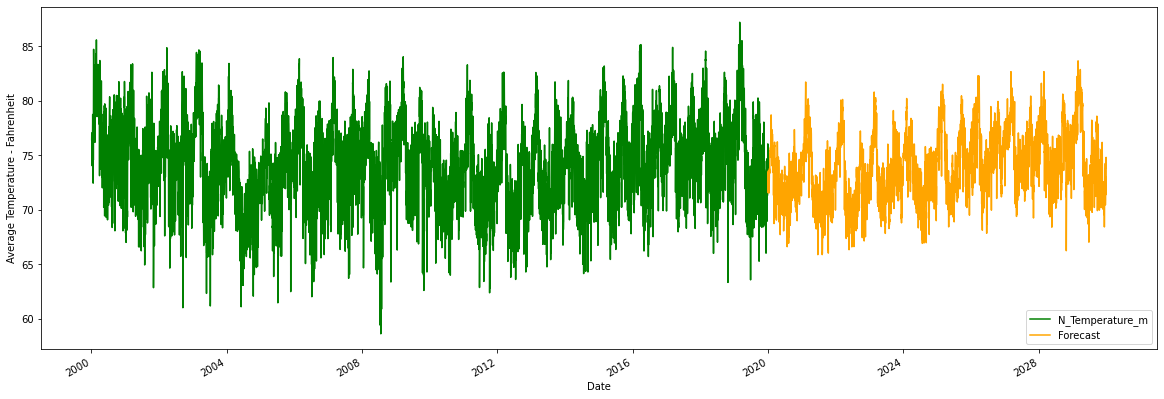

In [72]:
# Plotting data with the 3650-day forecast included
df_2000_2019['Forecast'] = np.nan
last_date = df_2000_2019.iloc[-1].name
last_unix = last_date.timestamp()
# Number of seconds in a day
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df_2000_2019.loc[next_date] = [np.nan for _ in range(len(df_2000_2019.columns)-1)]+[i]
df_2000_2019['N_Temperature_m'].plot(figsize=(20,7), color="green")
df_2000_2019['Forecast'].plot(figsize=(20,7), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.show()

In [74]:
df_2000_2019_forecast = pd.read_csv('df_2000_2019_forecast_f_v2.csv')

In [75]:
#df_2000_2019_forecast = df_2000_2019_forecast[['N_Temperature_m', 'Forecast']];
df_2000_2019_forecast.head();df_2000_2019_forecast.tail()

,timestamp,N_Temperature_m,N_Precipitation_Total
0,1/4/2000,74.975044,0.0
1,1/5/2000,73.589050,0.0
2,1/6/2000,73.913040,0.0
3,1/7/2000,76.451040,0.0
4,1/8/2000,77.063040,0.0


,timestamp,N_Temperature_m,N_Precipitation_Total
10947,12/23/2029,95.240809,0.554307
10948,12/24/2029,96.421419,0.653880
10949,12/25/2029,94.994438,0.629649
10950,12/26/2029,98.840185,0.321763
10951,12/27/2029,97.596889,0.148381


In [76]:
df_2000_2019_forecast.reset_index(inplace=True)
df_2000_2019_forecast['timestamp'] = pd.to_datetime(df_2000_2019_forecast['timestamp']);
#df_2000_2019_forecast['timestamp'] = df_2000_2019_forecast['timestamp'].dt.strftime('%Y-%M-%D')
print (df_2000_2019_forecast)
df_2000_2019_forecast.columns

       index  timestamp  N_Temperature_m  N_Precipitation_Total
0          0 2000-01-04        74.975044               0.000000
1          1 2000-01-05        73.589050               0.000000
2          2 2000-01-06        73.913040               0.000000
3          3 2000-01-07        76.451040               0.000000
4          4 2000-01-08        77.063040               0.000000
...      ...        ...              ...                    ...
10947  10947 2029-12-23        95.240809               0.554307
10948  10948 2029-12-24        96.421419               0.653880
10949  10949 2029-12-25        94.994438               0.629649
10950  10950 2029-12-26        98.840185               0.321763
10951  10951 2029-12-27        97.596889               0.148381

[10952 rows x 4 columns]


Index(['index', 'timestamp', 'N_Temperature_m', 'N_Precipitation_Total'], dtype='object')

In [77]:
df_2000_2019_forecast.reset_index()

,level_0,index,timestamp,N_Temperature_m,N_Precipitation_Total
0,0,0,2000-01-04,74.975044,0.000000
1,1,1,2000-01-05,73.589050,0.000000
2,2,2,2000-01-06,73.913040,0.000000
3,3,3,2000-01-07,76.451040,0.000000
4,4,4,2000-01-08,77.063040,0.000000
...,...,...,...,...,...
10947,10947,10947,2029-12-23,95.240809,0.554307
10948,10948,10948,2029-12-24,96.421419,0.653880
10949,10949,10949,2029-12-25,94.994438,0.629649
10950,10950,10950,2029-12-26,98.840185,0.321763


In [78]:
df_2000_2019_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10952 entries, 0 to 10951
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  10952 non-null  int64         
 1   timestamp              10952 non-null  datetime64[ns]
 2   N_Temperature_m        10952 non-null  float64       
 3   N_Precipitation_Total  10952 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 342.4 KB


In [79]:
df_newind = df_2000_2019_forecast.set_index('timestamp')
del df_newind['index'];
df_newind.head()

,N_Temperature_m,N_Precipitation_Total
timestamp,,
2000-01-04,74.975044,0.0
2000-01-05,73.589050,0.0
2000-01-06,73.913040,0.0
2000-01-07,76.451040,0.0
2000-01-08,77.063040,0.0


In [80]:
df_2000_2019_forecast_yearly = df_newind.resample('Y').mean();

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Yearly Temperature - Fahrenheit')

(70.0, 110.0)

Text(0.5, 1.0, 'Daily Temperature Variation in Nairobi\n From 2000 to 2029 ')

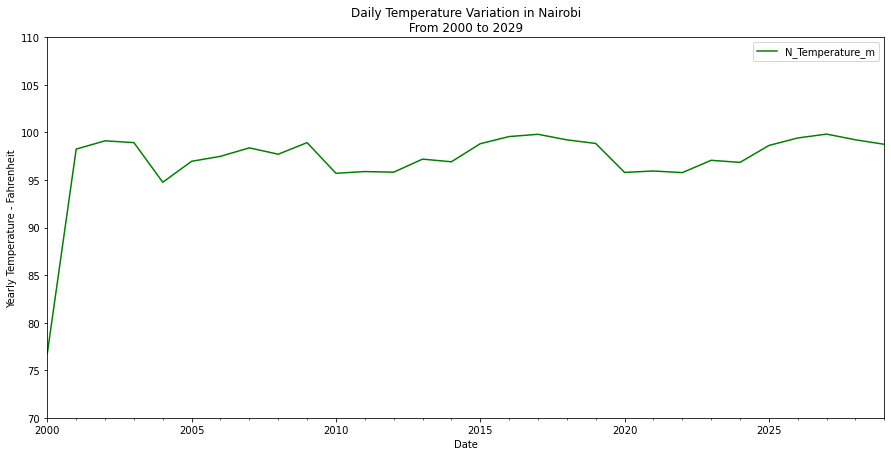

In [115]:
# Visualize some of the 'cleaned' data by plotting the monthly avg temperature in Nairobi from 2000 to 2019
df_2000_2019_forecast_yearly['N_Temperature_m'].plot(figsize=(15,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Yearly Temperature - Fahrenheit')
plt.ylim(70, 110)
plt.title("Daily Temperature Variation in Nairobi\n From 2000 to 2029 ")
plt.show()

Derive Features for Weather Prediction Experiment - Precipitation

In [116]:
features = ['N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Moisture_10cm']
# Function that creates columns representing Nth prior measurements of feature
# None values maintain the consistent rows length for each N
def derive_nth_day_feature(df_2000_2019_c, feature, N):  
    rows = df_2000_2019_c.shape[0]
    nth_prior_measurements = [None]*N + [df_2000_2019_c[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df_2000_2019_c[col_name] = nth_prior_measurements

In [117]:
# Call the above function using a loop through each feature
for feature in features:  
    if feature != 'DATE':
        for N in range(1, 4):
            derive_nth_day_feature(df_2000_2019_c, feature, N)

In [118]:
# Evaluate the distribution of the feature data and transpose it; drop latitude and longitude values
spread = df_2000_2019_c.describe().T
spread

,count,mean,std,min,25%,50%,75%,max
CO2 emissions (kt)_new,7302.0,1.221704e+04,4.199667e+03,6.524713e+03,8.323526e+03,1.212563e+04,1.657223e+04,1.889629e+04
Methane emissions (kt of CO2 equivalent)_new,7302.0,3.207159e+04,7.049659e+03,2.127384e+04,2.383551e+04,3.527414e+04,3.767150e+04,4.048676e+04
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,7302.0,1.511450e+04,3.254604e+03,9.874092e+03,1.151551e+04,1.687521e+04,1.759534e+04,1.876610e+04
"Population, total_new",7302.0,4.177505e+07,6.337256e+06,3.196455e+07,3.662489e+07,4.203068e+07,4.758377e+07,5.257397e+07
Urban population_new,7302.0,9.960945e+06,2.468821e+06,6.358383e+06,7.938440e+06,9.907048e+06,1.215802e+07,1.446153e+07
N_Temperature_m,7302.0,7.422655e+01,3.987833e+00,5.863105e+01,7.144704e+01,7.427304e+01,7.693704e+01,8.721504e+01
N_Precipitation_Total,7302.0,4.501948e-02,1.280846e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.149606e-02,2.807087e+00
N_Relative_Humidity_m,7302.0,9.113161e+01,6.480641e+00,5.100000e+01,8.700000e+01,9.300000e+01,9.600000e+01,1.000000e+02
N_Mean_Sea_Level_Pressure,7302.0,1.016960e+03,1.753984e+00,1.010800e+03,1.015700e+03,1.016900e+03,1.018100e+03,1.022800e+03
N_Soil_Moisture_10cm,7302.0,2.202962e-01,5.880886e-02,7.600000e-02,1.740000e-01,2.160000e-01,2.710000e-01,3.710000e-01


In [119]:
# Drop rows with NaN values
df_2000_2019_c = df_2000_2019_c.dropna()  
df_2000_2019_c.head()

,CO2 emissions (kt)_new,Methane emissions (kt of CO2 equivalent)_new,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,"Population, total_new",Urban population_new,N_Temperature_m,N_Precipitation_Total,N_Relative_Humidity_m,N_Mean_Sea_Level_Pressure,N_Soil_Moisture_10cm,...,N_Precipitation_Total_3,N_Relative_Humidity_m_1,N_Relative_Humidity_m_2,N_Relative_Humidity_m_3,N_Mean_Sea_Level_Pressure_1,N_Mean_Sea_Level_Pressure_2,N_Mean_Sea_Level_Pressure_3,N_Soil_Moisture_10cm_1,N_Soil_Moisture_10cm_2,N_Soil_Moisture_10cm_3
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-07,8229.000053,21279.218385,9874.091644,3.196456e+07,6.358389e+06,76.451040,0.0,100,1013.9,0.150,...,0.0,98.0,91.0,93.0,1014.2,1014.5,1013.6,0.154,0.158,0.162
2000-01-08,8230.634945,21281.821471,9879.977057,3.196456e+07,6.358389e+06,77.063040,0.0,97,1013.0,0.147,...,0.0,100.0,98.0,91.0,1013.9,1014.2,1014.5,0.150,0.154,0.158
2000-01-09,8231.667101,21276.187180,9878.654952,3.196456e+07,6.358392e+06,75.479050,0.0,94,1013.1,0.142,...,0.0,97.0,100.0,98.0,1013.0,1013.9,1014.2,0.147,0.150,0.154
2000-01-10,8228.025209,21280.695320,9876.591828,3.196456e+07,6.358389e+06,74.723045,0.0,99,1013.8,0.139,...,0.0,94.0,97.0,100.0,1013.1,1013.0,1013.9,0.142,0.147,0.150
2000-01-11,8232.780348,21275.603608,9878.841187,3.196456e+07,6.358391e+06,76.109050,0.0,100,1014.1,0.136,...,0.0,99.0,94.0,97.0,1013.8,1013.1,1013.0,0.139,0.142,0.147


In [120]:
# Assess the linearity between variables using the Pearson correlation coefficient. 
df_linear = df_2000_2019_c.corr()[['N_Precipitation_Total']].sort_values('N_Precipitation_Total')
df_linear
df_2000_2019_c.columns

,N_Precipitation_Total
N_Temperature_m,-0.261820
N_Temperature_m_1,-0.160675
N_Mean_Sea_Level_Pressure_1,-0.160666
N_Mean_Sea_Level_Pressure_2,-0.142884
N_Mean_Sea_Level_Pressure,-0.141272
N_Mean_Sea_Level_Pressure_3,-0.124735
N_Temperature_m_2,-0.103197
N_Temperature_m_3,-0.078958
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,0.077876
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1,0.077974


Index(['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'Urban population_new', 'N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Moisture_10cm',
       'CO2 emissions (kt)_new_1', 'CO2 emissions (kt)_new_2',
       'CO2 emissions (kt)_new_3',
       'Methane emissions (kt of CO2 equivalent)_new_1',
       'Methane emissions (kt of CO2 equivalent)_new_2',
       'Methane emissions (kt of CO2 equivalent)_new_3',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3',
       'Population, total_new_1', 'Population, total_new_2',
       'Population, total_new_3', 'Urban population_new_1',
       '

Visualizing Feature Relationships

In [121]:
# Create new dataframe with features of interest
predictors = ['N_Temperature_m_1', 'N_Temperature_m_2', 'N_Temperature_m_3',
       'N_Precipitation_Total_1', 'N_Precipitation_Total_2',
       'N_Precipitation_Total_3', 'N_Relative_Humidity_m_1',
       'N_Relative_Humidity_m_2', 'N_Relative_Humidity_m_3',
       'N_Mean_Sea_Level_Pressure_1', 'N_Mean_Sea_Level_Pressure_2',
       'N_Mean_Sea_Level_Pressure_3', 'N_Soil_Moisture_10cm_1',
       'N_Soil_Moisture_10cm_2', 'N_Soil_Moisture_10cm_3']
new_clt_climate_df2 = df_2000_2019_c[['N_Precipitation_Total'] + predictors] 
new_clt_climate_df2.head()

,N_Precipitation_Total,N_Temperature_m_1,N_Temperature_m_2,N_Temperature_m_3,N_Precipitation_Total_1,N_Precipitation_Total_2,N_Precipitation_Total_3,N_Relative_Humidity_m_1,N_Relative_Humidity_m_2,N_Relative_Humidity_m_3,N_Mean_Sea_Level_Pressure_1,N_Mean_Sea_Level_Pressure_2,N_Mean_Sea_Level_Pressure_3,N_Soil_Moisture_10cm_1,N_Soil_Moisture_10cm_2,N_Soil_Moisture_10cm_3
timestamp,,,,,,,,,,,,,,,,
2000-01-07,0.0,73.913040,73.58905,74.975044,0.0,0.0,0.0,98.0,91.0,93.0,1014.2,1014.5,1013.6,0.154,0.158,0.162
2000-01-08,0.0,76.451040,73.91304,73.589050,0.0,0.0,0.0,100.0,98.0,91.0,1013.9,1014.2,1014.5,0.150,0.154,0.158
2000-01-09,0.0,77.063040,76.45104,73.913040,0.0,0.0,0.0,97.0,100.0,98.0,1013.0,1013.9,1014.2,0.147,0.150,0.154
2000-01-10,0.0,75.479050,77.06304,76.451040,0.0,0.0,0.0,94.0,97.0,100.0,1013.1,1013.0,1013.9,0.142,0.147,0.150
2000-01-11,0.0,74.723045,75.47905,77.063040,0.0,0.0,0.0,99.0,94.0,97.0,1013.8,1013.1,1013.0,0.139,0.142,0.147


Using Step-wise Regression to Build a Model

In [122]:
# Separate predictor variables (X) from the outcome variable y
X = new_clt_climate_df2[predictors]  
y = new_clt_climate_df2['N_Precipitation_Total']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.iloc[:5, :5]  

,const,N_Temperature_m_1,N_Temperature_m_2,N_Temperature_m_3,N_Precipitation_Total_1
timestamp,,,,,
2000-01-07,1.0,73.913040,73.58905,74.975044,0.0
2000-01-08,1.0,76.451040,73.91304,73.589050,0.0
2000-01-09,1.0,77.063040,76.45104,73.913040,0.0
2000-01-10,1.0,75.479050,77.06304,76.451040,0.0
2000-01-11,1.0,74.723045,75.47905,77.063040,0.0


In [123]:
# Step 1 - Select a significance value
alpha = 0.05

# Step 2 - Fit the model
model = sm.OLS(y, X).fit()

# Step 3 - Evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.334
Model:                               OLS   Adj. R-squared:                  0.333
Method:                    Least Squares   F-statistic:                     243.4
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:41   Log-Likelihood:                 6125.3
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7283   BIC:                        -1.211e+04
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.1040      0.985      5.181      0.000       3.173       7.035
N_Temperature_m_1              -0.0011      0.001     -2.059      0.040      -0.002   -5.36e-05
N_Temperature_m_2               0.0014      0.001      2.337      0.019       0.000       0.003
N_Temperature_m_3               0.0004      0.001      0.656      0.512      -0.001       0.001
N_Precipitation_Total_1         0.4193      0.014     29.730      0.000       0.392       0.447
N_Precipitation_Total_2         0.0615      0.015      3.982      0.000       0.031       0.092
N_Precipitation_Total_3         0.1182      0.013      8.898      0.000       0.092       0.144
N_Relative_Humidity_m_1         0.0003      0.000      1.049      0.294      -0.000       0.001
N_Relative_Humidity_m_2        -0.0006      0.000     -1.985      0.047      -0.001   -7.32e-06
N_Relative_Humidity_m_3        -0.0003      0.000     -1.096      0.273      -0.001       0.000
N_Mean_Sea_Level_Pressure_1    -0.0133      0.002     -8.681      0.000      -0.016      -0.010
N_Mean_Sea_Level_Pressure_2     0.0076      0.002      3.659      0.000       0.004       0.012
N_Mean_Sea_Level_Pressure_3     0.0006      0.002      0.389      0.697      -0.002       0.004
N_Soil_Moisture_10cm_1          0.4356      0.099      4.420      0.000       0.242       0.629
N_Soil_Moisture_10cm_2         -0.2104      0.132     -1.589      0.112      -0.470       0.049
N_Soil_Moisture_10cm_3         -0.0382      0.093     -0.412      0.681      -0.220       0.144
==============================================================================
Omnibus:                     8201.903   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1857996.428
Skew:                           5.442   Prob(JB):                         0.00
Kurtosis:                      80.401   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('N_Temperature_m_3', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.334
Model:                               OLS   Adj. R-squared:                  0.333
Method:                    Least Squares   F-statistic:                     260.8
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:41   Log-Likelihood:                 6125.1
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7284   BIC:                        -1.212e+04
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.2495      0.960      5.469      0.000       3.368       7.131
N_Temperature_m_1              -0.0011      0.001     -1.995      0.046      -0.002   -1.86e-05
N_Temperature_m_2               0.0016      0.001      2.963      0.003       0.001       0.003
N_Precipitation_Total_1         0.4190      0.014     29.725      0.000       0.391       0.447
N_Precipitation_Total_2         0.0626      0.015      4.082      0.000       0.033       0.093
N_Precipitation_Total_3         0.1173      0.013      8.879      0.000       0.091       0.143
N_Relative_Humidity_m_1         0.0003      0.000      1.066      0.286      -0.000       0.001
N_Relative_Humidity_m_2        -0.0006      0.000     -2.044      0.041      -0.001   -2.49e-05
N_Relative_Humidity_m_3        -0.0003      0.000     -1.102      0.270      -0.001       0.000
N_Mean_Sea_Level_Pressure_1    -0.0132      0.002     -8.658      0.000      -0.016      -0.010
N_Mean_Sea_Level_Pressure_2     0.0076      0.002      3.661      0.000       0.004       0.012
N_Mean_Sea_Level_Pressure_3     0.0004      0.001      0.269      0.788      -0.003       0.003
N_Soil_Moisture_10cm_1          0.4446      0.098      4.556      0.000       0.253       0.636
N_Soil_Moisture_10cm_2         -0.2169      0.132     -1.643      0.100      -0.476       0.042
N_Soil_Moisture_10cm_3         -0.0460      0.092     -0.500      0.617      -0.227       0.135
==============================================================================
Omnibus:                     8204.344   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1859914.685
Skew:                           5.445   Prob(JB):                         0.00
Kurtosis:                      80.441   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('N_Relative_Humidity_m_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.334
Model:                               OLS   Adj. R-squared:                  0.333
Method:                    Least Squares   F-statistic:                     280.8
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:41   Log-Likelihood:                 6124.5
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7285   BIC:                        -1.212e+04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.3862      0.951      5.662      0.000       3.521       7.251
N_Temperature_m_1              -0.0011      0.001     -1.980      0.048      -0.002   -1.09e-05
N_Temperature_m_2               0.0016      0.001      2.889      0.004       0.001       0.003
N_Precipitation_Total_1         0.4189      0.014     29.721      0.000       0.391       0.447
N_Precipitation_Total_2         0.0631      0.015      4.112      0.000       0.033       0.093
N_Precipitation_Total_3         0.1167      0.013      8.842      0.000       0.091       0.143
N_Relative_Humidity_m_2        -0.0005      0.000     -1.753      0.080      -0.001    5.53e-05
N_Relative_Humidity_m_3        -0.0002      0.000     -0.931      0.352      -0.001       0.000
N_Mean_Sea_Level_Pressure_1    -0.0131      0.002     -8.604      0.000      -0.016      -0.010
N_Mean_Sea_Level_Pressure_2     0.0075      0.002      3.591      0.000       0.003       0.012
N_Mean_Sea_Level_Pressure_3     0.0003      0.001      0.221      0.825      -0.003       0.003
N_Soil_Moisture_10cm_1          0.4570      0.097      4.716      0.000       0.267       0.647
N_Soil_Moisture_10cm_2         -0.2228      0.132     -1.688      0.091      -0.481       0.036
N_Soil_Moisture_10cm_3         -0.0497      0.092     -0.540      0.589      -0.230       0.131
==============================================================================
Omnibus:                     8206.322   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1863019.562
Skew:                           5.447   Prob(JB):                         0.00
Kurtosis:                      80.506   Cond. No.                     1.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('N_Relative_Humidity_m_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.334
Model:                               OLS   Adj. R-squared:                  0.332
Method:                    Least Squares   F-statistic:                     303.8
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:42   Log-Likelihood:                 6123.0
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7286   BIC:                        -1.213e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.1181      0.939      5.450      0.000       3.277       6.959
N_Temperature_m_1              -0.0010      0.001     -1.938      0.053      -0.002    1.19e-05
N_Temperature_m_2               0.0016      0.001      2.944      0.003       0.001       0.003
N_Precipitation_Total_1         0.4188      0.014     29.705      0.000       0.391       0.446
N_Precipitation_Total_2         0.0638      0.015      4.156      0.000       0.034       0.094
N_Precipitation_Total_3         0.1160      0.013      8.796      0.000       0.090       0.142
N_Relative_Humidity_m_3        -0.0005      0.000     -2.412      0.016      -0.001   -9.76e-05
N_Mean_Sea_Level_Pressure_1    -0.0128      0.002     -8.469      0.000      -0.016      -0.010
N_Mean_Sea_Level_Pressure_2     0.0071      0.002      3.412      0.001       0.003       0.011
N_Mean_Sea_Level_Pressure_3     0.0007      0.001      0.492      0.623      -0.002       0.004
N_Soil_Moisture_10cm_1          0.4607      0.097      4.756      0.000       0.271       0.651
N_Soil_Moisture_10cm_2         -0.2465      0.131     -1.878      0.060      -0.504       0.011
N_Soil_Moisture_10cm_3         -0.0362      0.092     -0.394      0.693      -0.216       0.144
==============================================================================
Omnibus:                     8214.911   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1871815.012
Skew:                           5.456   Prob(JB):                         0.00
Kurtosis:                      80.690   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('N_Temperature_m_1', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.333
Model:                               OLS   Adj. R-squared:                  0.332
Method:                    Least Squares   F-statistic:                     331.0
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:42   Log-Likelihood:                 6121.1
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7287   BIC:                        -1.214e+04
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.7525      0.920      5.165      0.000       2.949       6.556
N_Temperature_m_2               0.0010      0.000      2.239      0.025       0.000       0.002
N_Precipitation_Total_1         0.4210      0.014     29.952      0.000       0.393       0.449
N_Precipitation_Total_2         0.0629      0.015      4.105      0.000       0.033       0.093
N_Precipitation_Total_3         0.1159      0.013      8.785      0.000       0.090       0.142
N_Relative_Humidity_m_3        -0.0005      0.000     -2.367      0.018      -0.001   -8.77e-05
N_Mean_Sea_Level_Pressure_1    -0.0121      0.001     -8.244      0.000      -0.015      -0.009
N_Mean_Sea_Level_Pressure_2     0.0064      0.002      3.153      0.002       0.002       0.010
N_Mean_Sea_Level_Pressure_3     0.0009      0.001      0.643      0.520      -0.002       0.004
N_Soil_Moisture_10cm_1          0.5039      0.094      5.343      0.000       0.319       0.689
N_Soil_Moisture_10cm_2         -0.2742      0.131     -2.101      0.036      -0.530      -0.018
N_Soil_Moisture_10cm_3         -0.0354      0.092     -0.386      0.700      -0.215       0.144
==============================================================================
Omnibus:                     8191.534   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1838487.812
Skew:                           5.433   Prob(JB):                         0.00
Kurtosis:                      79.988   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('N_Mean_Sea_Level_Pressure_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.333
Model:                               OLS   Adj. R-squared:                  0.332
Method:                    Least Squares   F-statistic:                     364.1
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:45   Log-Likelihood:                 6120.9
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7288   BIC:                        -1.214e+04
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.8835      0.897      5.443      0.000       3.125       6.642
N_Temperature_m_2               0.0010      0.000      2.263      0.024       0.000       0.002
N_Precipitation_Total_1         0.4210      0.014     29.958      0.000       0.393       0.449
N_Precipitation_Total_2         0.0631      0.015      4.117      0.000       0.033       0.093
N_Precipitation_Total_3         0.1151      0.013      8.764      0.000       0.089       0.141
N_Relative_Humidity_m_3        -0.0005      0.000     -2.378      0.017      -0.001   -9.02e-05
N_Mean_Sea_Level_Pressure_1    -0.0122      0.001     -8.365      0.000      -0.015      -0.009
N_Mean_Sea_Level_Pressure_2     0.0074      0.001      5.018      0.000       0.004       0.010
N_Soil_Moisture_10cm_1          0.5077      0.094      5.395      0.000       0.323       0.692
N_Soil_Moisture_10cm_2         -0.2814      0.130     -2.164      0.030      -0.536      -0.027
N_Soil_Moisture_10cm_3         -0.0313      0.092     -0.342      0.733      -0.211       0.148
==============================================================================
Omnibus:                     8189.924   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1836228.099
Skew:                           5.431   Prob(JB):                         0.00
Kurtosis:                      79.940   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('N_Soil_Moisture_10cm_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     N_Precipitation_Total   R-squared:                       0.333
Model:                               OLS   Adj. R-squared:                  0.332
Method:                    Least Squares   F-statistic:                     404.5
Date:                   Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:02:46   Log-Likelihood:                 6120.8
No. Observations:                   7299   AIC:                        -1.222e+04
Df Residuals:                       7289   BIC:                        -1.215e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.9183      0.891      5.518      0.000       3.171       6.666
N_Temperature_m_2               0.0010      0.000      2.240      0.025       0.000       0.002
N_Precipitation_Total_1         0.4211      0.014     29.964      0.000       0.394       0.449
N_Precipitation_Total_2         0.0654      0.014      4.754      0.000       0.038       0.092
N_Precipitation_Total_3         0.1133      0.012      9.486      0.000       0.090       0.137
N_Relative_Humidity_m_3        -0.0005      0.000     -2.455      0.014      -0.001      -0.000
N_Mean_Sea_Level_Pressure_1    -0.0122      0.001     -8.364      0.000      -0.015      -0.009
N_Mean_Sea_Level_Pressure_2     0.0073      0.001      5.007      0.000       0.004       0.010
N_Soil_Moisture_10cm_1          0.5078      0.094      5.396      0.000       0.323       0.692
N_Soil_Moisture_10cm_2         -0.3123      0.093     -3.342      0.001      -0.495      -0.129
==============================================================================
Omnibus:                     8191.322   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1838980.601
Skew:                           5.433   Prob(JB):                         0.00
Kurtosis:                      79.998   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the SciKit-Learn Linear Regression Module to Predict the Weather

The training and testing datasets are split into 80% training and 20% testing.

In [130]:
# A random_state of 12 is assigned to ensure getting the right random selection of data. 
# This random_state parameter is very useful for reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)  

In [131]:
# Instantiate the regressor class
regressor = LinearRegression()

# Fit and build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# Make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
print("Accuracy of Linear Regression: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f inches" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f inches" % median_absolute_error(y_test, prediction))

LinearRegression()

Accuracy of Linear Regression: 0.37
The Mean Absolute Error: 0.05 inches
The Median Absolute Error: 0.02 inches


Visualizing Weather Forecast Predictions

In [132]:
# 3650 days will be the number of forecast days
forecast_out = int(3650)

# X contains the last 'n=forecast_out' rows for which we don't have label data
# Put those rows in a different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 3650 & Length of X : 3649


In [133]:
# Predict average precipitiation for the next 3650 days using our Model
forecast_prediction = regressor.predict(X_forecast_out)
print(forecast_prediction)

[0.10081845 0.03599916 0.05653356 ... 0.11182362 0.06075046 0.02882121]


In [385]:
df_2000_2019_forecast_final = pd.read_csv('df_2000_2019_forecast_f_v2.csv')

In [386]:
df_2000_2019_forecast_final.head();df_2000_2019_forecast_final.tail()

,timestamp,N_Temperature_m,N_Precipitation_Total
0,1/4/2000,74.975044,0.0
1,1/5/2000,73.589050,0.0
2,1/6/2000,73.913040,0.0
3,1/7/2000,76.451040,0.0
4,1/8/2000,77.063040,0.0


,timestamp,N_Temperature_m,N_Precipitation_Total
10947,12/23/2029,85.488150,0.142479
10948,12/24/2029,86.547866,0.168073
10949,12/25/2029,85.267008,0.161845
10950,12/26/2029,88.718950,0.082706
10951,12/27/2029,87.602967,0.038140


In [387]:
df_2000_2019_forecast_final.reset_index(inplace=True)
df_2000_2019_forecast_final['timestamp'] = pd.to_datetime(df_2000_2019_forecast_final['timestamp']);

print (df_2000_2019_forecast_final)
df_2000_2019_forecast_final.columns

       index  timestamp  N_Temperature_m  N_Precipitation_Total
0          0 2000-01-04        74.975044               0.000000
1          1 2000-01-05        73.589050               0.000000
2          2 2000-01-06        73.913040               0.000000
3          3 2000-01-07        76.451040               0.000000
4          4 2000-01-08        77.063040               0.000000
...      ...        ...              ...                    ...
10947  10947 2029-12-23        85.488150               0.142479
10948  10948 2029-12-24        86.547866               0.168073
10949  10949 2029-12-25        85.267008               0.161845
10950  10950 2029-12-26        88.718950               0.082706
10951  10951 2029-12-27        87.602967               0.038140

[10952 rows x 4 columns]


Index(['index', 'timestamp', 'N_Temperature_m', 'N_Precipitation_Total'], dtype='object')

In [388]:
df_2000_2019_forecast_final['timestamp'] = pd.to_datetime(df_2000_2019_forecast_final.timestamp);

In [389]:
df_2000_2019_forecast_final

,index,timestamp,N_Temperature_m,N_Precipitation_Total
0,0,2000-01-04,74.975044,0.000000
1,1,2000-01-05,73.589050,0.000000
2,2,2000-01-06,73.913040,0.000000
3,3,2000-01-07,76.451040,0.000000
4,4,2000-01-08,77.063040,0.000000
...,...,...,...,...
10947,10947,2029-12-23,85.488150,0.142479
10948,10948,2029-12-24,86.547866,0.168073
10949,10949,2029-12-25,85.267008,0.161845
10950,10950,2029-12-26,88.718950,0.082706


In [390]:
df_newind = df_2000_2019_forecast_final.set_index('timestamp')
#del df_newind['index'];
df_newind.head()

,index,N_Temperature_m,N_Precipitation_Total
timestamp,,,
2000-01-04,0,74.975044,0.0
2000-01-05,1,73.589050,0.0
2000-01-06,2,73.913040,0.0
2000-01-07,3,76.451040,0.0
2000-01-08,4,77.063040,0.0


In [391]:
#df_2000_2019_forecast_final['timestamp'] = df_2000_2019_forecast_final['timestamp'].dt.strftime('%Y-%M-%D')
df_2000_2019_forecast_final_yearly = df_newind.resample('Y').mean();
df_2000_2019_forecast_final_yearly

,index,N_Temperature_m,N_Precipitation_Total
timestamp,,,
2000-12-31,181.0,76.777821,0.022039
2001-12-31,545.0,83.507986,0.052828
2002-12-31,910.0,84.248432,0.040302
2003-12-31,1275.0,84.088469,0.046084
2004-12-31,1640.5,80.546535,0.033586
2005-12-31,2006.0,82.420169,0.036563
2006-12-31,2371.0,82.863872,0.051065
2007-12-31,2736.0,83.619313,0.024090
2008-12-31,3101.5,83.051501,0.033000


<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Yearly Temperature - Fahrenheit')

(70.0, 110.0)

Text(0.5, 1.0, 'Predicted Daily Temperature Variation in Nairobi\n From 2000 to 2029 ')

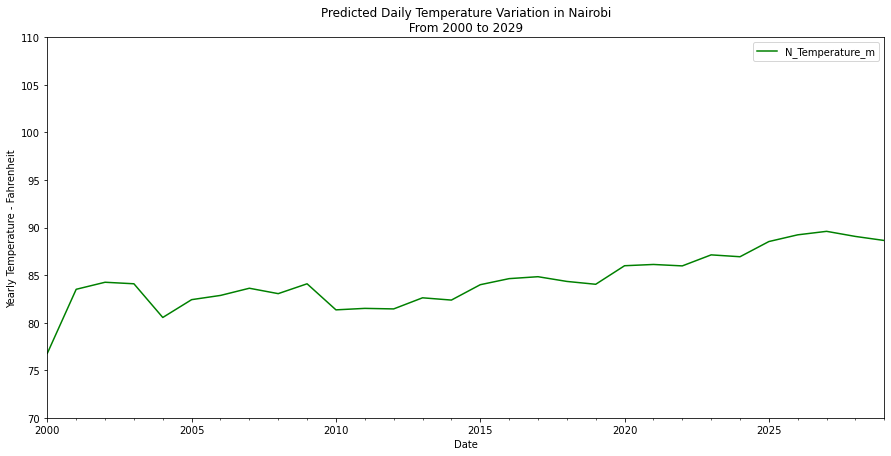

In [392]:
# Visualize some of the 'cleaned' data by plotting the monthly avg temperature in Nairobi from 2000 to 2019
df_2000_2019_forecast_final_yearly['N_Temperature_m'].plot(figsize=(15,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Yearly Temperature - Fahrenheit')
plt.ylim(70, 110)
plt.title("Predicted Daily Temperature Variation in Nairobi\n From 2000 to 2029 ")
plt.show()

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Precipitation (in)')

Text(0.5, 1.0, 'Predicted Daily Precipitation Variation in Nairobi\n From 2000 to 2029 ')

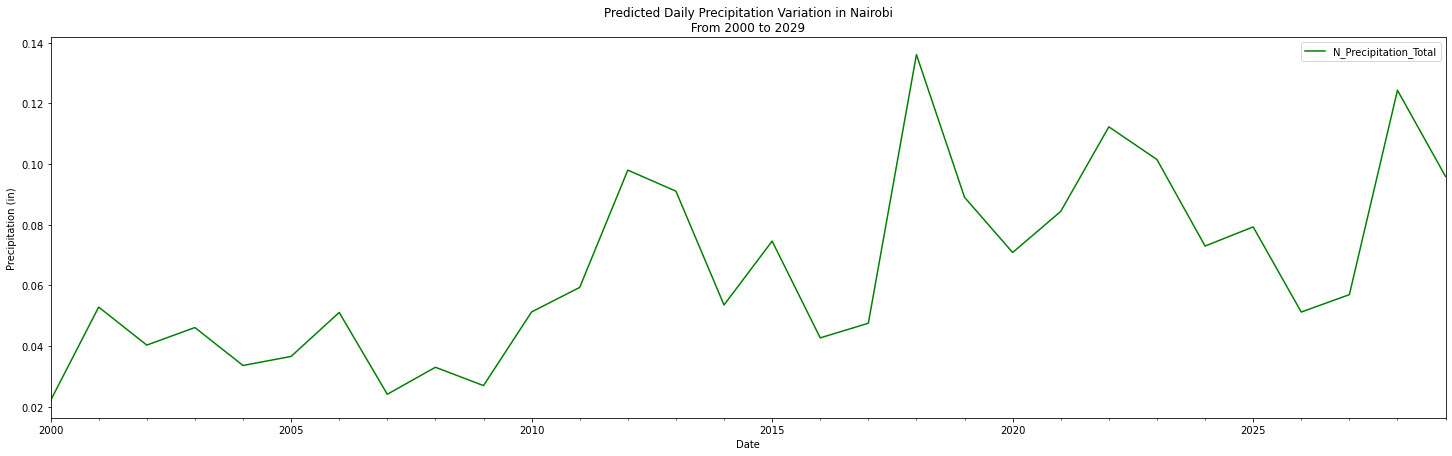

In [393]:
# Visualize some of the 'cleaned' data by plotting the daily avg temperature in Nairobi from 2000 to 2019
df_2000_2019_forecast_final_yearly['N_Precipitation_Total'].plot(figsize=(25,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title("Predicted Daily Precipitation Variation in Nairobi\n From 2000 to 2029 ")
plt.show()

### The Predicted ratios of Temperature and Total Precipitation from 2019 to 2029 are 1.05 & 3.5 respectively
### The ratios of Temperature and Total Precipitation from 1985 to 2019 are 1.01 & 6.97 respectively

In [394]:
df_2000_2019_forecast_final_yearly.columns

Index(['index', 'N_Temperature_m', 'N_Precipitation_Total'], dtype='object')

LinregressResult(slope=42.50952725417297, intercept=81.67480826770917, rvalue=0.4430085454778697, pvalue=0.014216599957452222, stderr=16.25750414691755)

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlation Strength between total precipitation and temperature')

Text(0.5, 0, 'Total Precipitation (in)')

Text(0, 0.5, 'Temperature (Deg F)')

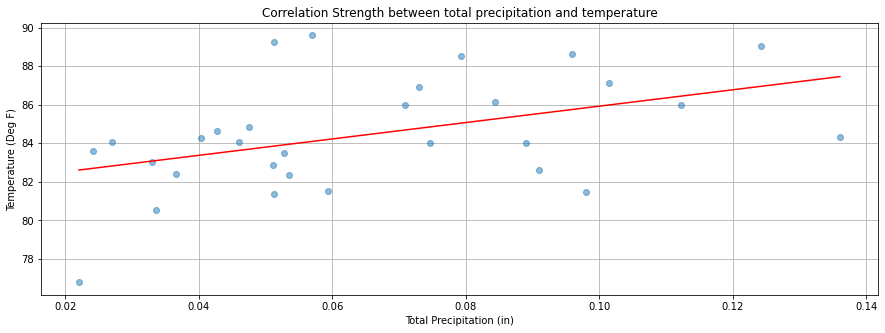

In [398]:
#Extract Variables to build Linear regression between total precipitation and Nitrous Oxide Emissions :
subset = df_2000_2019_forecast_final_yearly.dropna()
xs = subset['N_Precipitation_Total']
ys = subset['N_Temperature_m']
#Compute the linear regression:
res = linregress(xs, ys)
res

#Plot the Scatter Plot:
plt.figure(figsize=(15, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)
#plt.text(100, 150, "slope=0.5, rvalue=0.76")
plt.title('Correlation Strength between total precipitation and temperature')

#zoom-in to avoid outliers:
#plt.axis([0, 150, 0, 175])
plt.xlabel('Total Precipitation (in)')
plt.ylabel('Temperature (Deg F)')